Notas:
--------
Estoy ajustando el grafico KG, para guardarlo en un pdf con todos los graficos correspondientes al canal tradicional

__Revisar resultados:__

_Todos los promedios son en base a las facturaciones, sin poderar, ya que el modelo predictivo no contemplará una definición del precio según el volumen.(promedio ponderado)_
- [ ] Variación del precio mensua
- [ ] Variación del precio promedio 
- [ ] Variación del Ingreso promedio 
- [ ] Dispersipon del precio/KG

__Construir:__
- [ ] Precio Semanal de los clientes general
- [ ] Precio Semanal del canal(Facturaciones)
- [ ] Precio Semanal/año de los clientes para cada año
- [ ] Avance precio día, dispersión

__Passos siguientes:__
- Revisar el latex, para entender que pasos seguir
- Modelo de regresión que muestra la dispesión del precio respecto al volumen


In [1]:
#!jt -l
#!jt -t oceans16 -T
#!jt -r

# Inicio
__Rename__
Recordar que la columna llamada `Precio promedio` ahora es `Precio`
- Presenta los parametros del modelo
    - Dirección datos
    - Dirección Graficos
    - _Material a analizar_
    - _Canal a analizar_
    - _Zona de los Datos_
    - _Año de inicio de analizis_
- la Base de datos


`Tipo_de_Cliente`
`Y_producto`
`Año_inicio`

`file_direct_Graphic` 

## Parametros 

In [2]:
#===================================
# Archivo
#===================================
Zona_df='Z001'

#===================================
# Clientes
#===================================
Tipo_de_Cliente='Tradicional'

#===================================
# Producto de interes
#===================================
Y_producto='1010078'


#===================================
# Año de Partida
#===================================
Año_inicio='2018'




# Ordenador de escritorio

file_direct_O="C:/Users/user/Documents/Data/Data Clear/"+Zona_df+"/"
file_direct_Clear="C:/Users/user/Documents/Data/Data Clear/"
file_direct_Graphic='C:/Users/user/Documents/Graficos'
Png_file_direct_Graphic="C:\\Users\\user\\Documents\\Graficos"
"""

#Notebook
file_direct_O="C:/Users/rolft/Documents/Repositorios/Data/Data Clear/"+Zona_df+"/"
file_direct_Clear="C:/Users/rolft/Documents/Repositorios/Data/Data Clear/"
file_direct_Graphic='C:/Users/rolft/Documents/Repositorios/Graficos'
"""
#Graficos
file_direct_Graphic_Canal=file_direct_Graphic+"/"+Tipo_de_Cliente
file_direct_Graphic_Canal_Material=file_direct_Graphic_Canal+'/'+Y_producto

Png_file_direct_Graphic_Canal=Png_file_direct_Graphic+'\\'+'Canal '+Tipo_de_Cliente
Png_file_direct_Graphic_Canal_Material=Png_file_direct_Graphic_Canal+'\\'+Y_producto


## Intalar paquetes, Abrir data y ajustarla 

### import

In [3]:
#=====================================================
                # BASE 
#-----------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from geopandas import *

from plotnine import *

#para ajustar las fechas
import datetime

#para calcular el skew de un array() o list()
from scipy.stats import skew 

In [4]:
#=====================================================
                # sklearn 
#-----------------------------------------------------

#Separador de datos en train/test
from sklearn.model_selection import train_test_split

#Prediccion Ridge Regression
from sklearn.linear_model import Ridge

In [5]:
#=====================================================
                # statsmodels 
#-----------------------------------------------------
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning


#from statsmodels.regression.mixed_linear_model import MixedLMResults
# No se para qué sirve este

In [6]:
#====================================================
#librerias para crear division de series temporales
#====================================================

from mizani.breaks import date_breaks
from mizani.formatters import date_format

In [7]:
# stopwatch
import time
def time_convert(sec):
  mins = sec // 60
  sec = sec % 60
  hours = mins // 60
  mins = mins % 60
  print("Time Lapsed = {0}:{1}:{2}".format(int(hours),int(mins),sec),'\n H:m:s')
#==================================
#          Example
#    input("Press Enter to start")
#    start_time = time.time()
#    input("Press Enter to stop")
#    end_time = time.time()
#    time_lapsed = end_time - start_time
#    time_convert(time_lapsed)
#=================================

### Funciones 
```python
#Mes_name
data_i.Mes.apply(Mes_name)
```
>Transforma la columna mes numerica en el nombre del mes

__Forma de crear una etiqueta para un valor especifico__
```python
#[Y_Graph]
dfz=df.copy()
dfz['Año select']=dfz.apply( lambda x: x['Año'] if x['Año']==2020 else '',axis=1)
dfz
```

In [8]:
#===================================
# Dicionario MES
#===================================

#===================================
# Fecha
D=['Enero','Febrero','Marzo','Abril',
 'Mayo','Junio','Julio','Agosto',
 'Septiembre','Octubre',
 'Noviembre','Diciembre']
Month_dic={i:D[i-1]  for i in range(1,13)}
#===========================================


def Mes_name(x):
    D=['Enero','Febrero','Marzo','Abril',
    'Mayo','Junio','Julio','Agosto',
    'Septiembre','Octubre',
    'Noviembre','Diciembre']
    return(D[int(x)-1])

## Datos  
Se cargan los datos de
Ventas y la defincion de los productos
Ventas está en `data_v` y despues pasa a ser `data`

Productos estan cargados en `DF_products`


###  DF_FULL

##### Abrir Archivo  

In [9]:
#======================================================================
# Se Cargan los datos de ventas con las caracteristicas de los clientes
#=====================================================================

file_direct=file_direct_O+'Ventas_Full'+'.csv'
col_names=pd.read_csv(file_direct,
                      encoding="utf-8",sep=";",nrows=0).columns

types_dict = {col: str for col in list(col_names)}

DF_FULL = pd.read_csv(file_direct,
                   encoding="utf-8",sep=";",dtype=types_dict)
#elimina una columna en especifico
#DF_FULL.drop('Año natural', inplace=True, axis=1)
DF_FULL.head(1)

,Zona de ventas,Zona de ventas.1,Cliente,Cliente.1,Cliente - Local,Cliente - Local.1,Material,Día natural,Kilos Venta KG,Venta Neta,...,Tipo de material.1,Marca,Nivel 2,Granel/Envasado,Marinado,Nivel 3,Grupo artículos,Estado,Estandar,Envase
0,Z001,Santiago,10003742,Ferrer Leiva Sonia,Ferrer Leiva Sonia,38458,1010077,2018-02-09,12.0,13685.0,...,Prod. Term. Ave,SUPER POLLO (SP),Trutro,GRANEL,MARINADO,Trutro Entero,01050,REFRIGERADO,PESO VARIABLE,NO CONGELADO


#### Funcion

In [10]:
# =============================================================================
# Ajustar la data
# =============================================================================
def Ajuste_data(data):
    start_time = time.time()

    df=data.copy()

# =================================
# ELiminare dodos los valores Nan
# =================================
    #for i in df.columns.to_list():
    #    df=df[df[i].notna()]

#=================================
# Proceso iterativo Pasar a numero
#=================================

    for i in ['Kilos Venta KG','Venta Neta','Precio Promedio']:
        df[i]=df[i].astype('float64').astype('int64')
        
#=================================
# Agregar nombre al codigo del producto
#=================================
    def material_name(x):
        s1=str(x['Material'])
        s2=str(x['Nivel 4.1'])
        return(s1+'('+s2+')')
    df['Material (Nombre)']=df.apply(lambda x:  material_name(x), axis=1)
    


#==========================================================================================
# Ajuste de las fechas
#-----------------------------------------------------------------------------------------
    df["Día natural"] = df["Día natural"].apply(lambda x: 
                                                datetime.datetime.strptime(str(x),
                                                                           '%Y-%m-%d').date())
    
    #Separacion fecha
    
    #df['Semana']=df["Día natural"].apply(lambda x: x.isocalendar()[1] )
    #df['Mes']=df["Día natural"].apply(lambda x: x.month)
    #df['Año']=df["Día natural"].apply(lambda x: x.year)
    #df['Semana']=df['Semana'].astype('int64')
    df['Año']=df['Año'].astype('int64')
    D_W=['Lunes','Martes','Miércoles','Jueves', 'Viernes','Sábado','Domingo']
    df['Día Semana']=df["Día natural"].apply(lambda x: D_W[x.isocalendar()[2] -1])
    df=df[df['Día Semana']!='Domingo']
    
    DF_FULL.dtypes
    end_time = time.time()
    time_convert(end_time - start_time)
    return df

### Datos año de inicio
#### Rename

In [11]:
#=====================================
# Aplicacion del ajuste de los datos
#=====================================

data=Ajuste_data(DF_FULL).rename(
    columns={'Precio Promedio':'Precio'})
data[data.Año>=int(Año_inicio)]
data.dtypes

Time Lapsed = 0:0:20.521116495132446 
 H:m:s


Zona de ventas          object
Zona de ventas.1        object
Cliente                 object
Cliente.1               object
Cliente - Local         object
Cliente - Local.1       object
Material                object
Día natural             object
Kilos Venta KG           int64
Venta Neta               int64
Precio                   int64
Frecuencia Historica    object
Centro                  object
Centro.1                object
Población               object
Tipo de cliente         object
Cluster                 object
Segmento                object
Segmento.1              object
Categoría Cliente       object
Zona de reparto         object
Año Creación            object
Material Favorito       object
Semana                  object
Mes                     object
Año                      int64
Nivel 4                 object
Nivel 4.1               object
Sector                  object
Tipo de material        object
Tipo de material.1      object
Marca                   object
Nivel 2 

In [12]:
#=============================
# Se eliminaron los regristros donde existen dias domingos
#(No hay despacho los dias domingos)
#============================

data.shape[0] - DF_FULL.shape[0]

-256

# Selección data(Canal/material)
data frame `data_i`


> - Producto `i_producto = Y_producto`
> -Para el Canal `Tipo_de_Cliente`
> -Variable a predecir/Grafico `Y_Variable`

Columnas de interes para predecir `X_col`

Diccionario del grupo de columnas `Dic_col`

## data 

In [13]:
#==============================
# Se define el producto
#==============================
i_producto=Y_producto
data_i=data[
    (data['Tipo de cliente']==Tipo_de_Cliente)
    &(data.Material==i_producto)
].copy()


### Columnas a usar 
rename aplicado a `Precio promedio`

In [14]:
#=======================================================================================================
                                                # Columnas a usar
#========================================================================================================

data_i=data_i[[
                    #======================================   
                                    # Base de la venta
                    #--------------------------------------

'Material (Nombre)',
    #ID Nombre
    
#========================
#Cantidad/Ingreso/Precio
#------------------------
'Kilos Venta KG',
#'Venta Neta', No es necesario o de interes para la prediccion
'Precio',

#========================
#fecha
#------------------------
#'Día natural', #Se descarta por series de tiempo
    # Ver si funciona

'Día Semana',
    #lun, Mart, Mier, Juev
'Semana',
    #1, 2 , 3 ,..., 52, 53
'Mes',
    #1,2,3,...,12
'Año',
    #2018,2019,...,2021
    
    

#______________________________________________________________________
                        
                                    # CLIENTE
    
#=====================================
#Ubicacion del cliente
#-------------------------------------
'Población', #'Zona de reparto',
#Comuna del Cliente ; Codigo de la zona de reparto
#[No son excluyentes, la Zona de reparto
#Es más especifica y agrupa a clientes]


                #Region
                #'Zona de ventas',
                #'Zona de ventas.1',
                    #(Z001: Santiago)

#Es atendido por la sucursal:
'Centro.1', #'Centro', 
    #ID Sucursal, Nombre Sucursal(oficina o centro)
    
#=========================================    
#Identificacion del cliente
#---------------------------------------
'Cliente', #'Cliente.1',
     #ID del cliente , #nombre del cliente
 #'Cliente - Local', 'Cliente - Local.1'
     # Tambien funciona como ID
         #ID, Nombre

    #Agrupacion del cliente
    #'Tipo de cliente', #SON TODOS IGUALES
    'Cluster', 
         #Canal del cliente ; Tipo de cliente
             #Tradicional   ; Clasico

    #Nivel de cobertura
    #'Segmento', 
     'Segmento.1',
     #codigo ; nombre
         #50 ; Cobertura pequeno SD
    'Categoría Cliente',
            #Especialista en Proc


    #===================================================
    #Caracteristicas Adiocinales a su consumo
    #-------------------------------------------------
        'Año Creación',
            #Fecha de afiliación a Agrosuper
             #-> Debe ser INT idealmente

        'Material Favorito',
             #ID del producto que ha comprado más frecuentemente
             #(No por cantidad, si no que por cantidad de compras realizadas)
                 #-> Puede ser solo el codigo o el nombre tambien

        'Frecuencia Historica',
             #Cantidad de compras realizadas desde el 2018
                 #-> debe ser INT
                     #-> constante para todas las compras
                            # Al ser variable complejiza todo
 
]]
data_i['Frecuencia Historica']=data_i['Frecuencia Historica'].astype('int64')
data_i['Año Creación']=data_i['Año Creación'].astype('int64')

In [15]:

print('Data Full',DF_FULL.shape)
print(data.shape[0]-DF_FULL.shape[0],
      data.shape[1]-DF_FULL.shape[1])
print('Data Año',data.shape)
print(data_i.shape[0]-data.shape[0],
      data_i.shape[1]-data.shape[1])
print('Data Año, Canal Producto',data_i.shape)

Data Full (1061161, 40)
-256 2
Data Año (1060905, 42)
-862309 -26
Data Año, Canal Producto (198596, 16)


In [16]:
desc=data_i.describe(include='all').reset_index()
desc[desc['index']=='unique']

,index,Material (Nombre),Kilos Venta KG,Precio,Día Semana,Semana,Mes,Año,Población,Centro.1,Cliente,Cluster,Segmento.1,Categoría Cliente,Año Creación,Material Favorito,Frecuencia Historica
1,unique,1,NaN,NaN,6,53,12,NaN,46,3,5073,3,3,5,NaN,13,NaN


### Dicionario 
rename aplicado a `Precio promedio`

In [17]:
Dic_col={
        'Fecha':
                             ['Día natural','Día Semana','Semana', 'Mes', 'Año'],
        'Ubicacion':
                             ['Población', 'Centro.1'],
        'Cliente Categoria':
                             ['Cluster','Segmento.1', 'Categoría Cliente'],
        'Cliente Atributos':
                             ['Año Creación', 'Material Favorito','Frecuencia Historica']
         ,'Base':
                             ['Material (Nombre)', 'Kilos Venta KG', 'Precio','Cliente']
        }

In [18]:
#List sirve para definir las columnas de interes para los datos
list_=[]
for i in Dic_col:
    list_+=Dic_col[i]
print(len(list_))

17


###### __Rename__

```python
#data_i[Dic_col['Base']]
data_i.rename(
    columns={'Precio Promedio':'Precio'}, errors="raise")
data_i[Dic_col['Base']]
```

# Variacion precio mes

Material Precios y volumen por venta


__Boxplot__ mensuales y semanales, con los diferentes años, de esta forma se superponen los años en un mismo mes 


Se estan usando todos los datos para estos graficos 

###### Función Graficos

`custom_date_format1` define los meses en un rango enumerado, para el eje X
`Mes_name` Entrega el nombre del mes, cuando se entrega el numero

In [19]:
i=Y_producto
T_i=Tipo_de_Cliente

In [20]:

def custom_date_format1(breaks):
    """
    Function to format the date
    """
    D=['Enero','Febrero','Marzo','Abril',
    'Mayo','Junio','Julio','Agosto',
    'Septiembre','Octubre',
    'Noviembre','Diciembre']
    Month_dic={i:D[i-1]  for i in range(1,13)}
    return [Month_dic[x.month] if  x.day==1 else "" for x in breaks]


def Mes_name(x):
    D=['Enero','Febrero','Marzo','Abril',
    'Mayo','Junio','Julio','Agosto',
    'Septiembre','Octubre',
    'Noviembre','Diciembre']
    return(D[int(x)-1])


##### Data Grafico 
`df Material=i & Canal = T_i`
`Año categorico, mes name`

Se trabajará la demanda promedio de cada cliente mensualmente.

Cuidado, cuando se utilizan variables que cambian en un for, porque pueden cambiar los valores objetivos principales del estudio

###### Data_i 

In [21]:
print(Dic_col.keys())
a=[j for i in 
   ['Base','Fecha', 'Ubicacion', 'Cliente Categoria', 'Cliente Atributos']
   for j in Dic_col[i]  ]
print(a)
data[a].head(2)

dict_keys(['Fecha', 'Ubicacion', 'Cliente Categoria', 'Cliente Atributos', 'Base'])
['Material (Nombre)', 'Kilos Venta KG', 'Precio', 'Cliente', 'Día natural', 'Día Semana', 'Semana', 'Mes', 'Año', 'Población', 'Centro.1', 'Cluster', 'Segmento.1', 'Categoría Cliente', 'Año Creación', 'Material Favorito', 'Frecuencia Historica']


,Material (Nombre),Kilos Venta KG,Precio,Cliente,Día natural,Día Semana,Semana,Mes,Año,Población,Centro.1,Cluster,Segmento.1,Categoría Cliente,Año Creación,Material Favorito,Frecuencia Historica
0,1010077(Trutro Entero Selección),12,1190,10003742,2018-02-09,Viernes,6,2,2018,La Pintana,Sucursal Lo Espejo,Clásico,Cobertura Pequeno SD,Especialista en Proc,2007,1010077,19
1,1010077(Trutro Entero Selección),12,1350,10003742,2018-05-04,Viernes,18,5,2018,La Pintana,Sucursal Lo Espejo,Clásico,Cobertura Pequeno SD,Especialista en Proc,2007,1010077,19


In [22]:
#======================================
# Kilos de venta
#======================================
#Filtro Material/Tipo de cliente
print('Clientes totales',len(data.Cliente.unique()))

data_i=data[(data['Material']==Y_producto) &
                    (data['Tipo de cliente']==Tipo_de_Cliente) #&
                                 ].copy()#data

print(data_i.shape)
print('Clientes Seleccionados',len(data_i.Cliente.unique()))

Columnas_a_usar=[j for i in 
                 ['Base','Fecha', 'Ubicacion', 'Cliente Categoria', 'Cliente Atributos']
                 for j in Dic_col[i]  ]

data_i=data_i[Columnas_a_usar]
#======================================

#Ajuste Columnas 
data_i.Año=data_i.Año.astype('category')
print(data_i.Año.dtype)
data_i['Mes_num']=data_i["Mes"]#.apply(lambda x: Mes_name(x))
print(data_i.shape)
data_i['Mes']=data_i["Mes_num"].apply(lambda x: Mes_name(x))
print(data_i.shape)
data_i[['Mes','Mes_num','Día natural']].head()
print(data_i.shape)

data_i['Ingresos en CLP']=data_i['Precio']*data_i['Kilos Venta KG']
data_i.head(2)

Clientes totales 7560
(198596, 42)
Clientes Seleccionados 5073
category
(198596, 18)
(198596, 18)
(198596, 18)


,Material (Nombre),Kilos Venta KG,Precio,Cliente,Día natural,Día Semana,Semana,Mes,Año,Población,Centro.1,Cluster,Segmento.1,Categoría Cliente,Año Creación,Material Favorito,Frecuencia Historica,Mes_num,Ingresos en CLP
61455,1010078(Trutro Entero Selección),22,1300,10003742,2020-05-23,Sábado,21,Mayo,2020,La Pintana,Sucursal Lo Espejo,Clásico,Cobertura Pequeno SD,Especialista en Proc,2007,1010077,19,5,28600
61456,1010078(Trutro Entero Selección),110,1174,10007508,2018-03-01,Jueves,9,Marzo,2018,Puente Alto,Sucursal Lo Espejo,Clásico,Cobertura Mediano SD,Especialista en Crud,2007,1020253,464,3,129140


# Precio TEMPORAL 
Por lo general no es de mucho interes, ya que los volumnes de pedido, no cambian

__Verificar la demanda, sumada__

Se presentarán varias demandas, Se deben evaluar y señalar cuales osn de interes.
- [x] La simple,que cada pounto es una facturación
- [x] una promedio, de cada cliente de forma mensual.
- [x] la total del mes que consume cada cliente.
__(Falta definir guardado)__
- [x] la total del mes/Año que consume cada cliente.

In [23]:
Y_Graph='Precio'

##### Data Grafico 
`df Material=i & Canal = T_i`
`Año categorico, mes name`

Se trabajará la demanda promedio de cada cliente mensualmente.

Cuidado, cuando se utilizan variables que cambian en un for, porque pueden cambiar los valores objetivos principales del estudio

###### Data_i 

In [24]:
print(Dic_col.keys())
a=[j for i in 
   ['Base','Fecha', 'Ubicacion', 'Cliente Categoria', 'Cliente Atributos']
   for j in Dic_col[i]  ]
print(a)
data[a].head(2)

dict_keys(['Fecha', 'Ubicacion', 'Cliente Categoria', 'Cliente Atributos', 'Base'])
['Material (Nombre)', 'Kilos Venta KG', 'Precio', 'Cliente', 'Día natural', 'Día Semana', 'Semana', 'Mes', 'Año', 'Población', 'Centro.1', 'Cluster', 'Segmento.1', 'Categoría Cliente', 'Año Creación', 'Material Favorito', 'Frecuencia Historica']


,Material (Nombre),Kilos Venta KG,Precio,Cliente,Día natural,Día Semana,Semana,Mes,Año,Población,Centro.1,Cluster,Segmento.1,Categoría Cliente,Año Creación,Material Favorito,Frecuencia Historica
0,1010077(Trutro Entero Selección),12,1190,10003742,2018-02-09,Viernes,6,2,2018,La Pintana,Sucursal Lo Espejo,Clásico,Cobertura Pequeno SD,Especialista en Proc,2007,1010077,19
1,1010077(Trutro Entero Selección),12,1350,10003742,2018-05-04,Viernes,18,5,2018,La Pintana,Sucursal Lo Espejo,Clásico,Cobertura Pequeno SD,Especialista en Proc,2007,1010077,19


In [25]:
#======================================
# Kilos de venta
#======================================
#Filtro Material/Tipo de cliente
print('Clientes totales',len(data.Cliente.unique()))

data_i=data[(data['Material']==Y_producto) &
                    (data['Tipo de cliente']==Tipo_de_Cliente) #&
                                 ].copy()#data

print(data_i.shape)
print('Clientes Seleccionados',len(data_i.Cliente.unique()))

Columnas_a_usar=[j for i in 
                 ['Base','Fecha', 'Ubicacion', 'Cliente Categoria', 'Cliente Atributos']
                 for j in Dic_col[i]  ]

data_i=data_i[Columnas_a_usar]
#======================================

#Ajuste Columnas 
data_i.Año=data_i.Año.astype('category')
print(data_i.Año.dtype)
data_i['Mes_num']=data_i["Mes"]#.apply(lambda x: Mes_name(x))
print(data_i.shape)
data_i['Mes']=data_i["Mes_num"].apply(lambda x: Mes_name(x))
print(data_i.shape)
data_i[['Mes','Mes_num','Día natural']].head()
print(data_i.shape)
data_i.head(2)

Clientes totales 7560
(198596, 42)
Clientes Seleccionados 5073
category
(198596, 18)
(198596, 18)
(198596, 18)


,Material (Nombre),Kilos Venta KG,Precio,Cliente,Día natural,Día Semana,Semana,Mes,Año,Población,Centro.1,Cluster,Segmento.1,Categoría Cliente,Año Creación,Material Favorito,Frecuencia Historica,Mes_num
61455,1010078(Trutro Entero Selección),22,1300,10003742,2020-05-23,Sábado,21,Mayo,2020,La Pintana,Sucursal Lo Espejo,Clásico,Cobertura Pequeno SD,Especialista en Proc,2007,1010077,19,5
61456,1010078(Trutro Entero Selección),110,1174,10007508,2018-03-01,Jueves,9,Marzo,2018,Puente Alto,Sucursal Lo Espejo,Clásico,Cobertura Mediano SD,Especialista en Crud,2007,1020253,464,3


## Facturación
Trabaja con data_i que son los datos  `Material=y_producto & Canal = Tipo_de_cliente`

###### Descripción 

In [26]:
df_desc=data_i\
.groupby(['Mes_num','Mes']).describe().reset_index()
df_desc.Mes_num=df_desc.Mes_num.astype('int64')
df_desc.sort_values(by=['Mes_num'])[['Mes',Y_Graph]]

Mes   Precio                                                  \
                  count         mean         std    min     25%     50%   
0        Enero  14929.0  1325.142005  149.181226  300.0  1250.0  1350.0   
4      Febrero  13679.0  1261.170773  105.775165  700.0  1200.0  1274.0   
5        Marzo  17595.0  1260.994373  101.094654   61.0  1200.0  1250.0   
6        Abril  17968.0  1216.632903   98.639491  600.0  1150.0  1250.0   
7         Mayo  17177.0  1300.441928   94.349588  670.0  1250.0  1300.0   
8        Junio  17826.0  1257.133401   99.668390  650.0  1200.0  1250.0   
9        Julio  19695.0  1230.040975  102.811465  700.0  1180.0  1222.0   
10      Agosto  19775.0  1286.033578  105.598315  800.0  1220.0  1290.0   
11  Septiembre  16250.0  1388.185969  148.711486  500.0  1300.0  1390.0   
1      Octubre  18119.0  1349.403113  141.099575  500.0  1290.0  1390.0   
2    Noviembre  13173.0  1284.635922  151.163869  450.0  1227.0  1350.0   
3    Diciembre  12410.0  1334.748106  176.665479  300.0  1250.0  1320.0   

                    
       75%     max  
0   1400.0  2117.0  
4   1320.0  2250.0  
5   1320.0  1866.0  
6   1290.0  1750.0  
7   1350.0  1790.0  
8   1350.0  2502.0  
9   1290.0  1680.0  
10  1360.0  2250.0  
11  1490.0  2058.0  
1   1450.0  1800.0  
2   1390.0  2350.0  
3   1400.0  2117.0

#### Grafico 

##### Grafico Codigo 
Cuidado, no se puede aplicar un filtro y una modificación al mismo tiempo, ya que se tienen difernetes dimenciones.

###### Data Promedio

In [27]:
df=data_i\
.groupby(['Año','Mes']).mean().reset_index()

df.head()

,Año,Mes,Kilos Venta KG,Precio
0,2018,Abril,94.563489,1211.851218
1,2018,Agosto,101.064818,1205.079266
2,2018,Diciembre,122.014038,1238.509909
3,2018,Enero,91.849656,1284.775344
4,2018,Febrero,80.795155,1334.837809


###### Grafico valores promedio

C:\Users\user\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


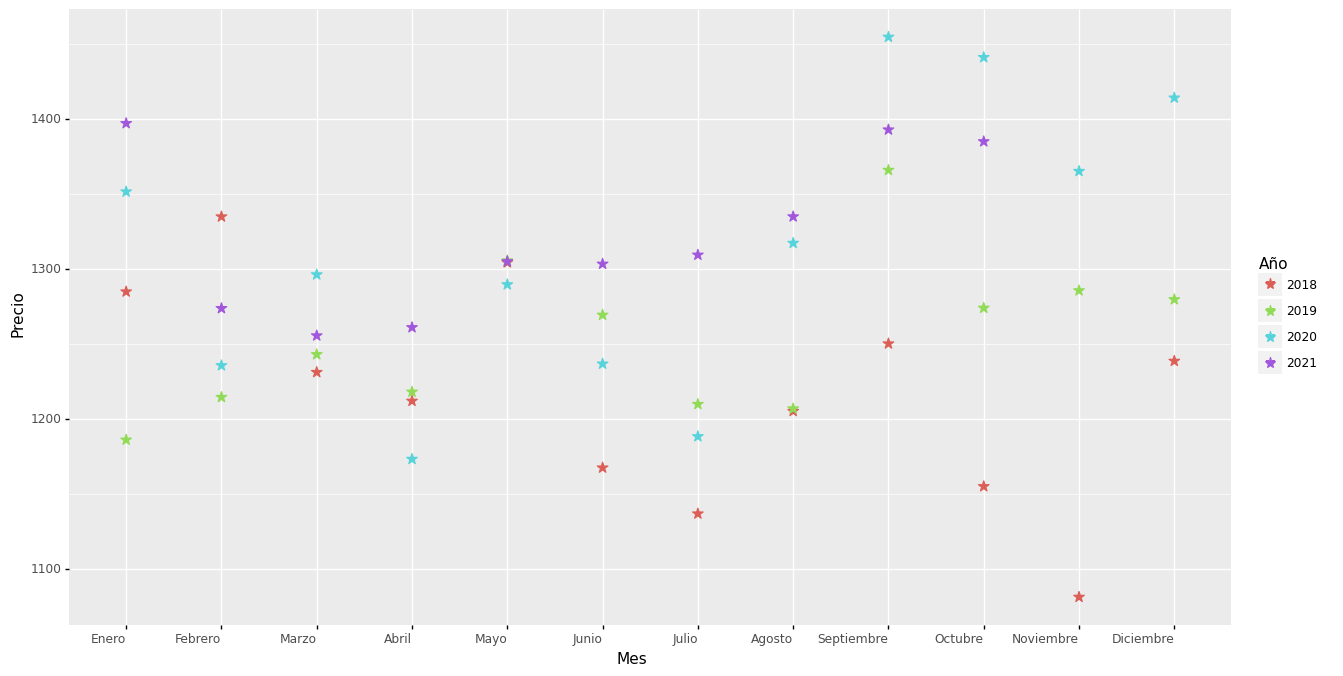

<ggplot: (139725467898)>

In [28]:
Y_Graph='Precio'
Mean_graph=(ggplot(
    df
    ,aes(
        x='Mes',#df["Mes"].apply(lambda x: Mes_name(x) ),
        y= Y_Graph ,
        color='Año' ))\
+ geom_point(shape='*',size=4)

#+scale_y_continuous(limits=(0,250), breaks=range(0,250,25))    

+theme(axis_text_x = element_text(hjust=1),figure_size=(15,8))

+scale_x_discrete(limits= ['Enero','Febrero','Marzo','Abril',
'Mayo','Junio','Julio','Agosto',
'Septiembre','Octubre',
'Noviembre','Diciembre'])
)
Mean_graph

###### Grafico conjunto 

C:\Users\user\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


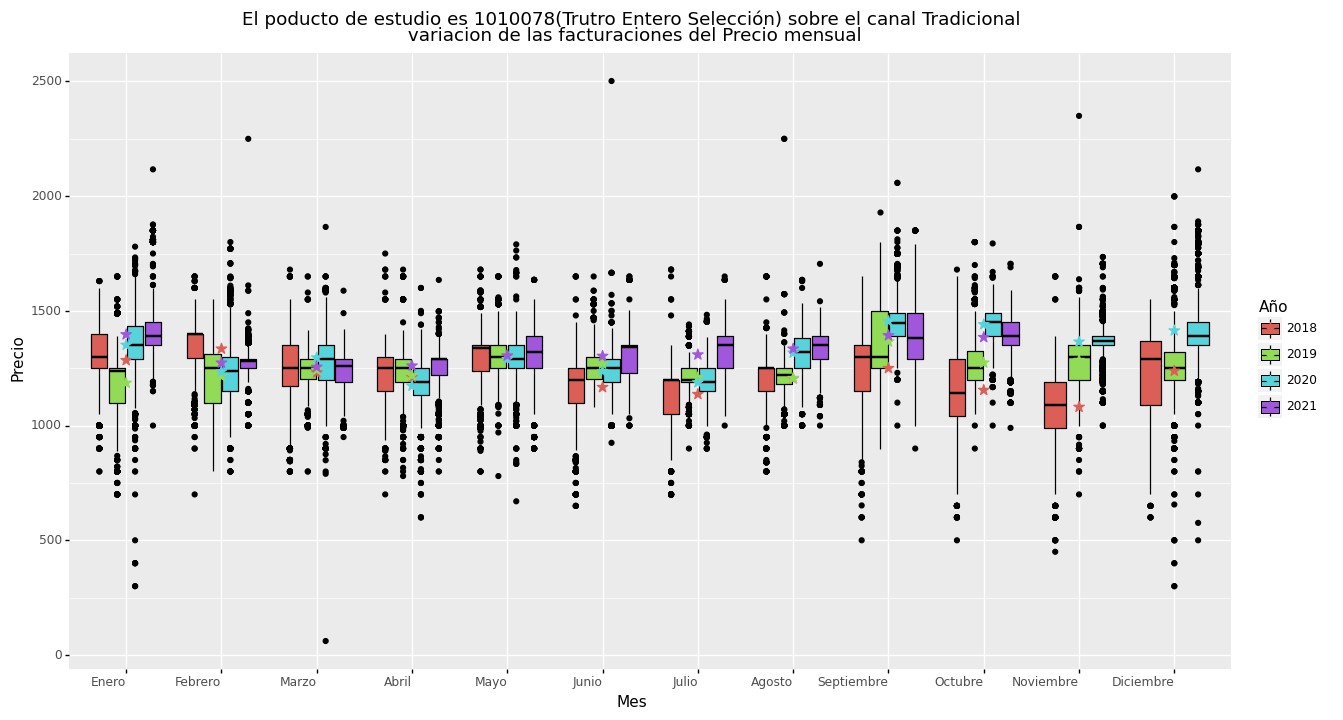

<ggplot: (139735651548)>

In [29]:
s=data_i['Material (Nombre)'].unique()[0]
Y_Graph='Precio'

Graph_KG_mes=(
ggplot(
    data_i
    ,aes(
        x='Mes',#df["Mes"].apply(lambda x: Mes_name(x) ),
        y= Y_Graph ,
        color='Año',
        fill='Año'
    ))


+ geom_boxplot(color='black')
    
+ geom_point(df
             ,shape='*',
             size=4)
             #,
             #fill=df['Año'],
             #color='black')#df['Año'])

+ggtitle('El poducto de estudio es '+s+ ' sobre el canal '+ Tipo_de_Cliente
             +'\n variacion de '+'las facturaciones del ' +Y_Graph + ' mensual')

    
#+scale_y_continuous(limits=(0,250), breaks=range(0,250,25))
    
    
+theme(axis_text_x = element_text(hjust=1),figure_size=(15,8))

+scale_x_discrete(limits= ['Enero','Febrero','Marzo','Abril',
'Mayo','Junio','Julio','Agosto',
'Septiembre','Octubre',
'Noviembre','Diciembre'])
)
Graph_KG_mes

##### Grafico plot 

C:\Users\user\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


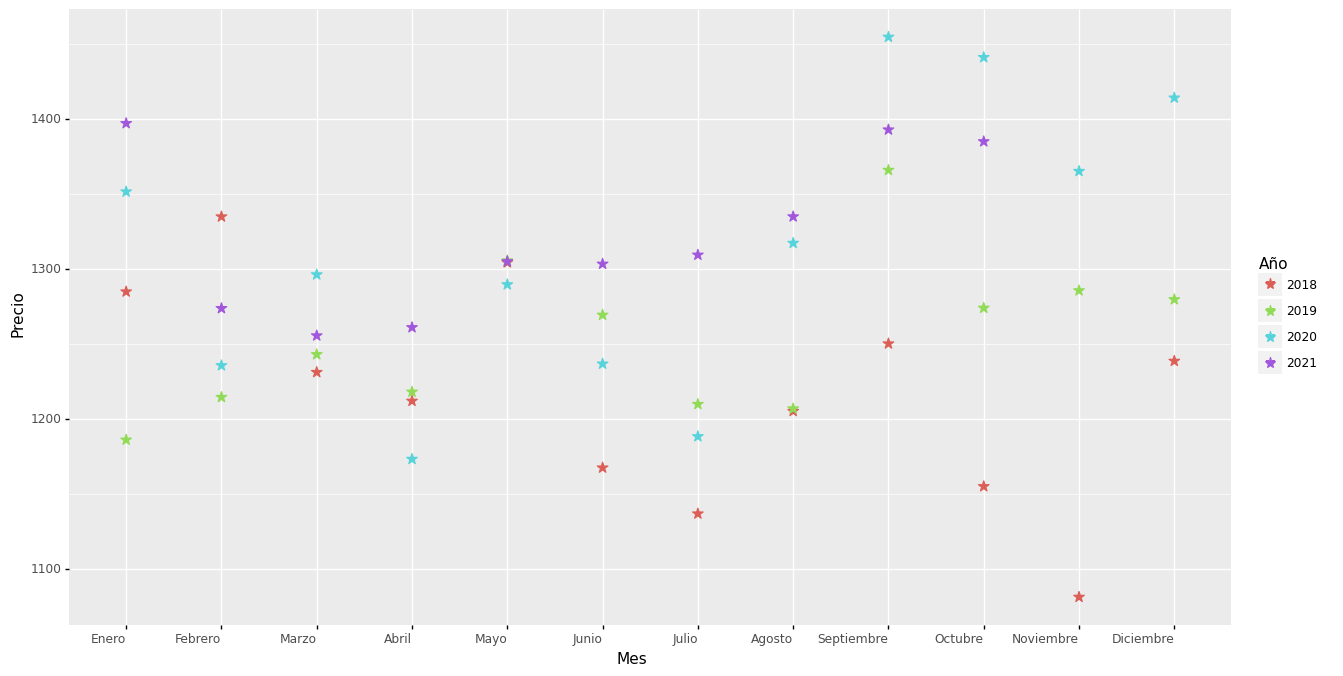

C:\Users\user\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


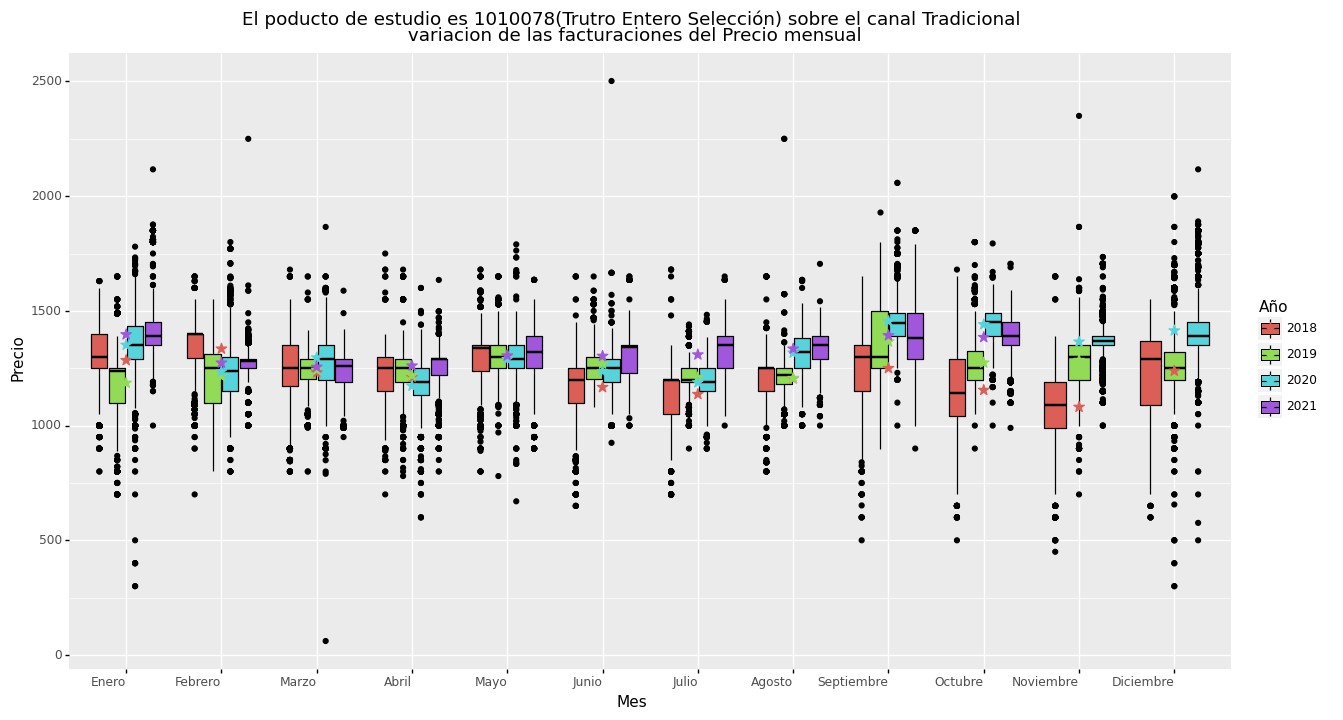

[<ggplot: (139725467898)>, <ggplot: (139735651548)>]

In [30]:
[Mean_graph,Graph_KG_mes]

#### PNG Save

In [31]:
pngfill= Png_file_direct_Graphic_Canal_Material+'\\'+Y_Graph
file_name='Boxplot Mensual Precio'
ggsave(plot = Graph_KG_mes,
       filename = file_name, 
       path =pngfill
      ,dpi = 300
      )

C:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 15 x 8 in image.
C:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: C:\Users\user\Documents\Graficos\Canal Tradicional\1010078\Precio\Boxplot Mensual Precio
C:\Users\user\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


Se aprecia que el grosor de las facturaciones, son de bajo volumen, pese al cambio de los meses.

## Promedio Mes/Año
__Del volumen del lote solicitado, en cada factura__

### Promedio, mensual/Año por cada cliente
Trabaja con data_i que son los datos  `Material=y_producto & Canal = Tipo_de_cliente`

###### Data Group 
`df=data_i.groupby(['Cliente','Año','Mes']).mean().reset_index()`

In [32]:
df=data_i.groupby(['Cliente','Año','Mes']).mean().reset_index()
df=df.dropna()
df.head()

,Cliente,Año,Mes,Kilos Venta KG,Precio
32,10003742,2020,Mayo,22.0,1300.0
48,10007508,2018,Abril,66.0,1200.0
49,10007508,2018,Agosto,66.0,1033.0
50,10007508,2018,Diciembre,66.0,1090.0
53,10007508,2018,Julio,66.0,1050.0


##### Grafico 

###### Grafico Codigo 
Cuidado, no se puede aplicar un filtro y una modificación al mismo tiempo, ya que se tienen difernetes dimenciones.

In [33]:
df_mean=data_i\
.groupby(['Año','Mes']).mean().reset_index()
df_mean=df_mean.dropna()
df_mean.head()

#+geom_point(df_mean,shape='*',size=4)
#+scale_y_continuous(limits=(0,250), breaks=range(0,250,25))


,Año,Mes,Kilos Venta KG,Precio
0,2018,Abril,94.563489,1211.851218
1,2018,Agosto,101.064818,1205.079266
2,2018,Diciembre,122.014038,1238.509909
3,2018,Enero,91.849656,1284.775344
4,2018,Febrero,80.795155,1334.837809


In [34]:
print(df[Y_Graph].min(),df[Y_Graph].max())

350.0 1882.0


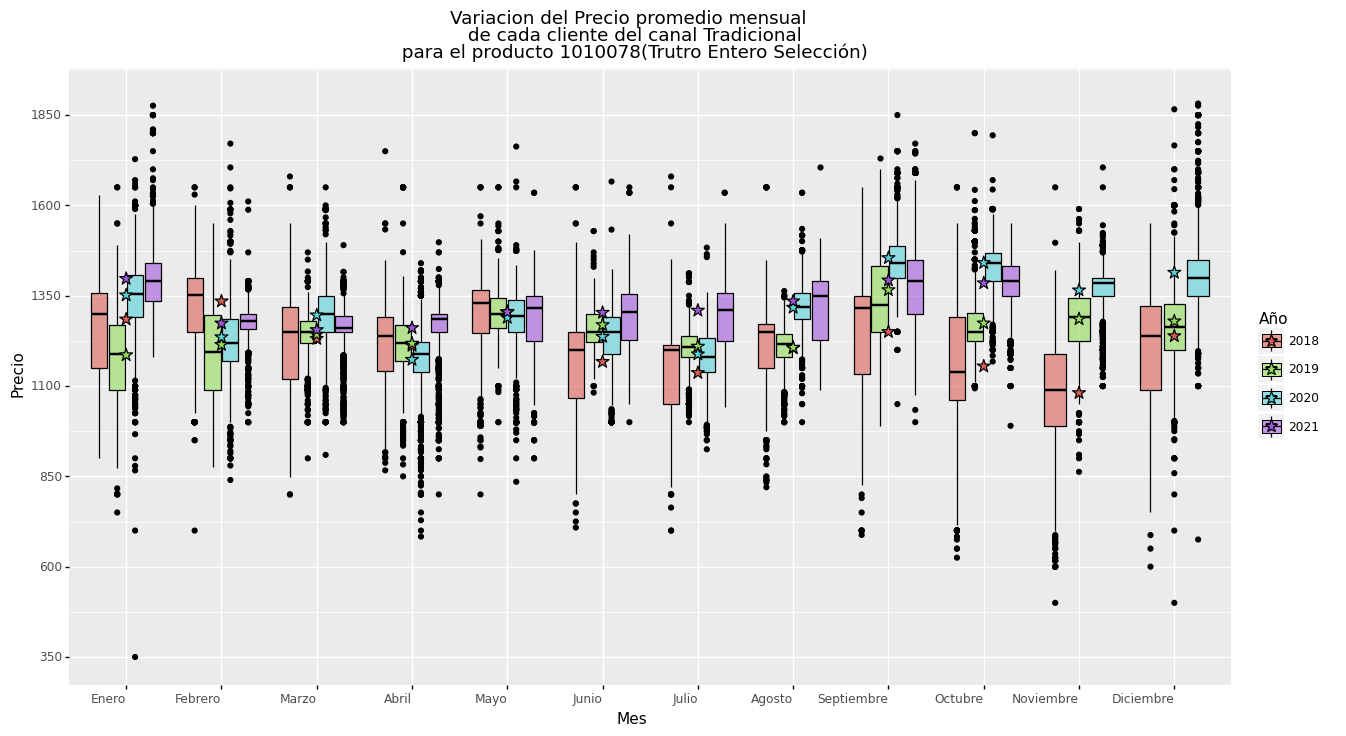

<ggplot: (139735969970)>

In [35]:
s=data_i['Material (Nombre)'].unique()[0]
Y_Graph='Precio'

Graph_KG_mes=(
ggplot(
    df_mean
    ,aes(
        x='Mes',#df["Mes"].apply(lambda x: Mes_name(x) ),
         y= Y_Graph ,
        color='Año',
        fill='Año'
    ))


+ geom_boxplot(df,color='black',alpha=0.6)
    
+ geom_point(shape='*',size=5 ,color='black')
             #,
             #fill=df['Año'],
             #color='black')#df['Año'])


#+geom_text(label=(df_mean[df_mean[Y_Graph]])[Y_Graph].astype('int64'))
#        ,ha='left',color='black',va='top'
#        ,lineheight=8
#        )
    
+ggtitle(   'Variacion del ' +Y_Graph + ' promedio mensual \n de cada cliente'
            + ' del canal '+ Tipo_de_Cliente 
            +'\n para el producto '+s
        )

    

+theme(axis_text_x = element_text(hjust=1),figure_size=(15,8))
+coord_cartesian(ylim = [350,1900])

+scale_y_continuous( breaks=range(350,1900,250))
#limits=(350,1900), Se eliminó el atributo limits, pero se dejo el break
    
+scale_x_discrete(limits= ['Enero','Febrero','Marzo','Abril',
'Mayo','Junio','Julio','Agosto',
'Septiembre','Octubre',
'Noviembre','Diciembre'])
)
Graph_KG_mes

###### Grafico plot 

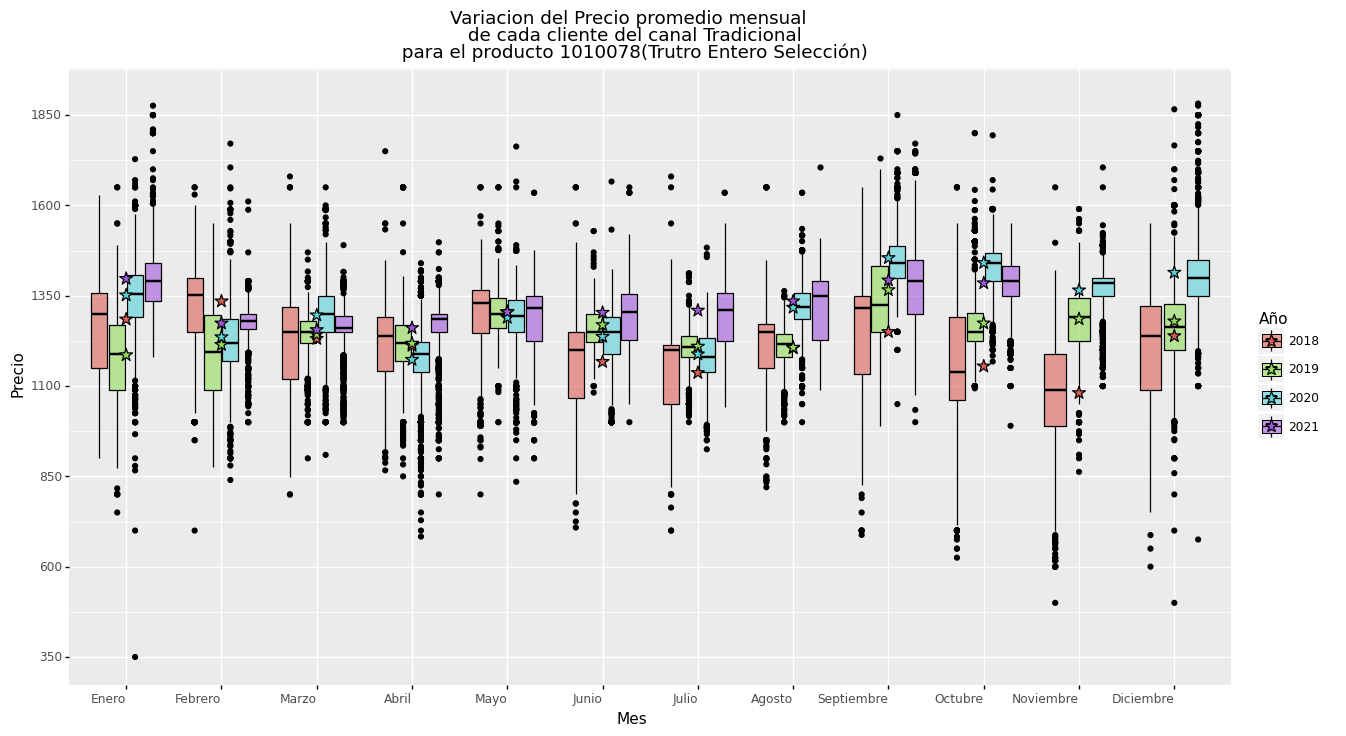

<ggplot: (139735969970)>

In [36]:
Graph_KG_mes

#### PNG Save

In [37]:
pngfill= Png_file_direct_Graphic_Canal_Material+'\\'+Y_Graph
file_name='Boxplot Precio promedio de cada cliente Mens_Año'
ggsave(plot = Graph_KG_mes,
       filename = file_name, 
       path =pngfill
      ,dpi = 300
      )

C:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 15 x 8 in image.
C:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: C:\Users\user\Documents\Graficos\Canal Tradicional\1010078\Precio\Boxplot Precio promedio de cada cliente Mens_Año


### Promedio, mensual por cada cliente
Trabaja con data_i que son los datos  `Material=y_producto & Canal = Tipo_de_cliente`

###### Data Group 
`df=data_i.groupby(['Cliente','Mes']).mean().reset_index()`


In [38]:
Dic_col['Base']

['Material (Nombre)', 'Kilos Venta KG', 'Precio', 'Cliente']

In [39]:
data_i.groupby(['Cliente','Mes']).mean()

Kilos Venta KG    Precio
Cliente  Mes                                 
10003742 Mayo             22.000000  1300.000
10007508 Abril           104.562500  1171.250
         Agosto           93.200000  1284.150
         Diciembre       100.833333  1292.500
         Enero            90.750000  1254.125
...                             ...       ...
9994662  Octubre          22.000000  1450.000
         Septiembre       22.000000  1295.000
9994800  Diciembre        22.000000  1390.000
         Junio            22.000000  1150.000
9997223  Julio            22.000000  1090.000

[35862 rows x 2 columns]

In [40]:
df=data_i.groupby(['Cliente','Mes']).mean().reset_index()
df=df.dropna()
df

,Cliente,Mes,Kilos Venta KG,Precio
0,10003742,Mayo,22.000000,1300.000
1,10007508,Abril,104.562500,1171.250
2,10007508,Agosto,93.200000,1284.150
3,10007508,Diciembre,100.833333,1292.500
4,10007508,Enero,90.750000,1254.125
...,...,...,...,...
35857,9994662,Octubre,22.000000,1450.000
35858,9994662,Septiembre,22.000000,1295.000
35859,9994800,Diciembre,22.000000,1390.000
35860,9994800,Junio,22.000000,1150.000


##### Describe 

In [41]:
df_desc=data_i.groupby(['Cliente','Mes_num','Mes']).mean().reset_index().dropna()\
.groupby(['Mes_num','Mes']).describe().reset_index()
df_desc.Mes_num=df_desc.Mes_num.astype('int64')
df_desc.sort_values(by=['Mes_num'])[['Mes',Y_Graph]]

Mes  Precio                                                    \
                 count         mean         std         min          25%   
0        Enero  2520.0  1330.678037  123.272875  350.000000  1279.000000   
4      Febrero  2659.0  1253.669509   83.561384  700.000000  1200.000000   
5        Marzo  2809.0  1270.272747   73.168311  875.000000  1250.000000   
6        Abril  3600.0  1216.326770   79.839678  683.333333  1178.399123   
7         Mayo  3166.0  1293.918165   77.862428  886.666667  1250.000000   
8        Junio  3164.0  1257.576514   81.412051  825.000000  1204.916667   
9        Julio  3403.0  1228.138487   85.399679  700.000000  1163.848485   
10      Agosto  3235.0  1292.081517   86.583739  840.000000  1241.833333   
11  Septiembre  3238.0  1380.613252  111.136336  700.000000  1337.597222   
1      Octubre  3090.0  1356.758440  101.325250  700.000000  1314.033333   
2    Noviembre  2618.0  1306.070389  113.768125  600.000000  1254.795455   
3    Diciembre  2360.0  1344.213538  135.233598  800.000000  1280.937500   

                                      
            50%          75%     max  
0   1350.000000  1400.000000  1850.0  
4   1270.500000  1300.698052  1650.0  
5   1270.000000  1306.666667  1650.0  
6   1228.000000  1267.653846  1650.0  
7   1301.877622  1347.500000  1650.0  
8   1269.000000  1309.027778  1650.0  
9   1229.000000  1290.000000  1635.0  
10  1296.666667  1350.000000  1705.0  
11  1392.266917  1445.000000  1750.0  
1   1375.231579  1420.000000  1800.0  
2   1330.000000  1390.000000  1705.0  
3   1350.000000  1400.000000  1876.0

##### Grafico 

###### Grafico Codigo 
Cuidado, no se puede aplicar un filtro y una modificación al mismo tiempo, ya que se tienen difernetes dimenciones.

In [42]:
df_mean=data_i\
.groupby(['Mes']).mean().reset_index()

df_mean.head()

#+geom_point(df_mean,shape='*',size=4)
#+scale_y_continuous(limits=(0,250), breaks=range(0,250,25))


,Mes,Kilos Venta KG,Precio
0,Abril,88.837545,1216.632903
1,Agosto,92.143161,1286.033578
2,Diciembre,104.203787,1334.748106
3,Enero,97.021636,1325.142005
4,Febrero,94.802325,1261.170773


In [43]:
print(
df[Y_Graph].min(),
df[Y_Graph].max()
)

350.0 1876.0


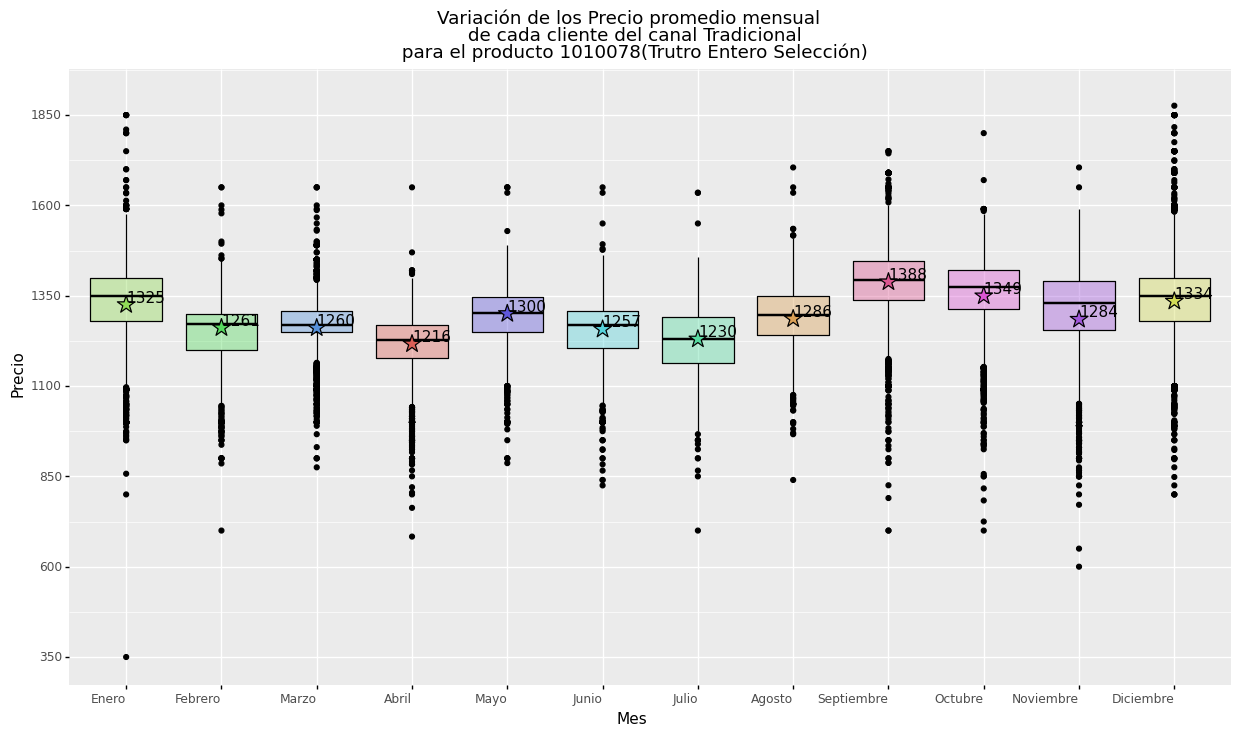

<ggplot: (139787576314)>

In [44]:
s=data_i['Material (Nombre)'].unique()[0]
Y_Graph='Precio'

Graph_KG_mes=(
ggplot(
    df_mean
    ,aes(
        x='Mes',#df["Mes"].apply(lambda x: Mes_name(x) ),
        y= Y_Graph ,
        color='Mes',
        fill='Mes'
    ))


+ geom_boxplot(df,color='black',alpha=0.4)
    
+ geom_point(df_mean
             ,shape='*',color='black',
             size=7)
             #,
             #fill=df['Año'],
             #)#df['Año'])


+geom_text(
         label=df_mean[Y_Graph].astype('int64')
        ,ha='left',color='black',va='bottom'
        ,lineheight=14
        )#hjust=0,vjust=0    
    
    
+coord_cartesian(ylim = [350,1900])
+scale_y_continuous( breaks=range(350,1900,250))
#limits=(350,1900), Se eliminó el atributo limits, pero se dejo el break    
    
+ggtitle('Variación de los ' +Y_Graph + ' promedio mensual \n de cada cliente'
            + ' del canal '+ Tipo_de_Cliente 
            +'\n para el producto '+s)

+theme(axis_text_x = element_text(hjust=1),figure_size=(15,8),
      legend_position='none'
      )

+scale_x_discrete(limits= ['Enero','Febrero','Marzo','Abril',
'Mayo','Junio','Julio','Agosto',
'Septiembre','Octubre',
'Noviembre','Diciembre'])
)
Graph_KG_mes

###### Grafico plot 

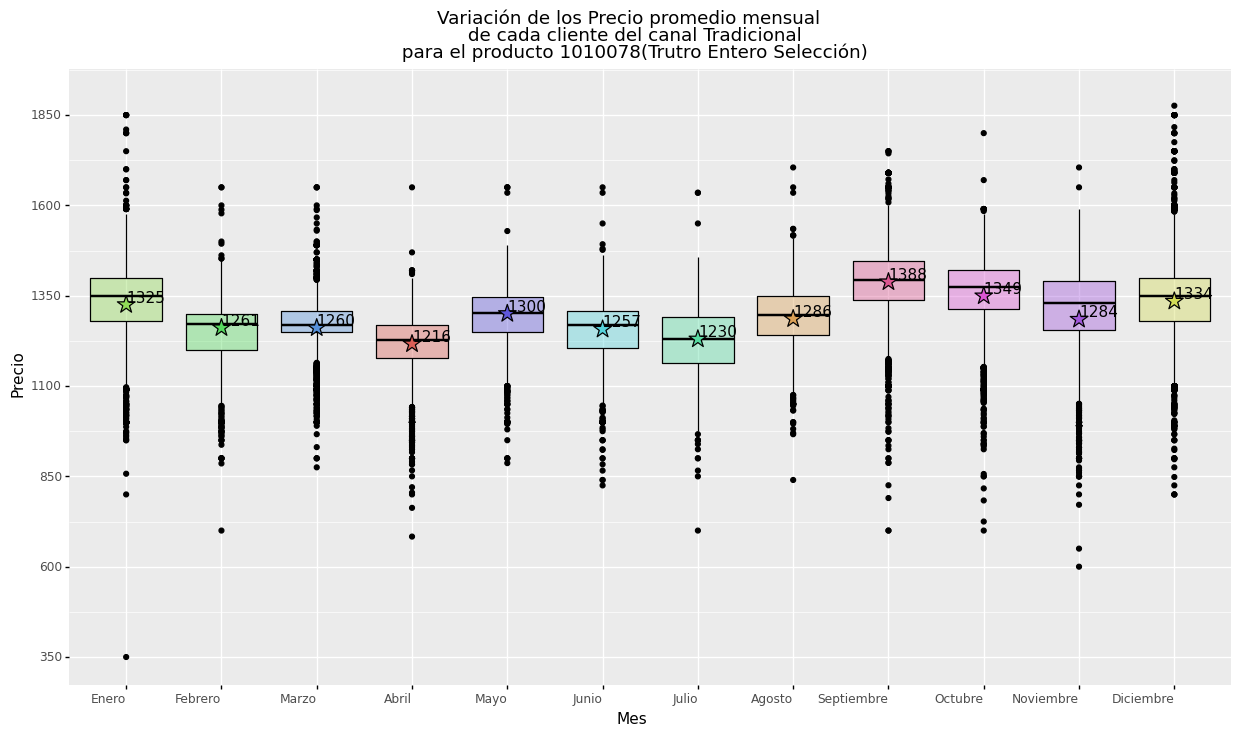

<ggplot: (139787576314)>

In [45]:
Graph_KG_mes

#### PNG Save

In [46]:
pngfill= Png_file_direct_Graphic_Canal_Material+'\\'+Y_Graph
file_name='Boxplot '+Y_Graph+' promedio de cada cliente Mens'
ggsave(plot = Graph_KG_mes,
       filename = file_name, 
       path =pngfill
      ,dpi = 300
      )

C:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 15 x 8 in image.
C:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: C:\Users\user\Documents\Graficos\Canal Tradicional\1010078\Precio\Boxplot Precio promedio de cada cliente Mens


### Promedio, Anual por cada cliente
Trabaja con data_i que son los datos  `Material=y_producto & Canal = Tipo_de_cliente`

###### Data Group 

In [47]:
Dic_col['Base']

['Material (Nombre)', 'Kilos Venta KG', 'Precio', 'Cliente']

In [48]:
data_i.groupby(['Cliente','Año']).mean()

Kilos Venta KG       Precio
Cliente  Año                              
10003742 2018             NaN          NaN
         2019             NaN          NaN
         2020            22.0  1300.000000
         2021             NaN          NaN
10007508 2018            76.4  1072.066667
...                       ...          ...
9994800  2021            22.0  1150.000000
9997223  2018             NaN          NaN
         2019             NaN          NaN
         2020            22.0  1090.000000
         2021             NaN          NaN

[20292 rows x 2 columns]

In [49]:
df=data_i.groupby(['Cliente','Año']).mean().reset_index()
df.Año=df.Año.astype('category')
df=df.dropna()
df

,Cliente,Año,Kilos Venta KG,Precio
2,10003742,2020,22.000000,1300.000000
4,10007508,2018,76.400000,1072.066667
5,10007508,2019,92.538462,1227.692308
6,10007508,2020,95.397727,1288.556818
7,10007508,2021,94.348485,1305.454545
...,...,...,...,...
20282,9994662,2020,22.000000,1290.000000
20283,9994662,2021,22.000000,1330.000000
20286,9994800,2020,22.000000,1390.000000
20287,9994800,2021,22.000000,1150.000000


##### Describe 

In [50]:
df.groupby('Año').describe()[Y_Graph]

,count,mean,std,min,25%,50%,75%,max
Año,,,,,,,,
2018,1624.0,1192.330336,140.795558,600.0,1090.000000,1213.541667,1296.794545,1750.0
2019,2440.0,1245.861379,78.384889,900.0,1200.000000,1250.000000,1290.169643,1700.0
2020,4345.0,1301.678329,87.872376,800.0,1254.166667,1307.500000,1352.040541,1850.0
2021,4288.0,1303.474266,77.007680,900.0,1256.666667,1308.000000,1350.000000,1876.0


##### Grafico 

###### Grafico Codigo 
Cuidado, no se puede aplicar un filtro y una modificación al mismo tiempo, ya que se tienen difernetes dimenciones.

In [51]:
df_mean=data_i\
.groupby(
    ['Año']).mean().reset_index()

df_mean[Y_Graph]=df_mean[Y_Graph].astype('int64')
df_mean.head()

#+geom_point(df_mean,shape='*',size=4)
#+scale_y_continuous(limits=(0,250), breaks=range(0,250,25))


,Año,Kilos Venta KG,Precio
0,2018,112.246090,1213
1,2019,103.403833,1253
2,2020,90.839182,1313
3,2021,89.387859,1319


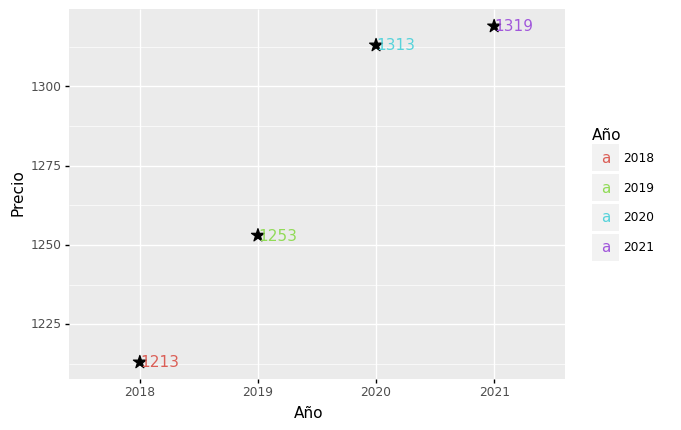

<ggplot: (139787571258)>

In [52]:
(ggplot(
    df_mean
    ,aes(
        x='Año',#df["Mes"].apply(lambda x: Mes_name(x) ),
        y= Y_Graph
        ,color='Año'
        ))

    +geom_point(shape='*',size=5,color='black')

  +geom_text(label=(df_mean[df_mean[Y_Graph]>=90])[Y_Graph],
              ha='left'
             ,lineheight=14)
             #,size=20
            )#hjust=0,vjust=0


Variación del Precio promedio anual 
 de cada cliente del canal Tradicional
 para el producto 1010078(Trutro Entero Selección)


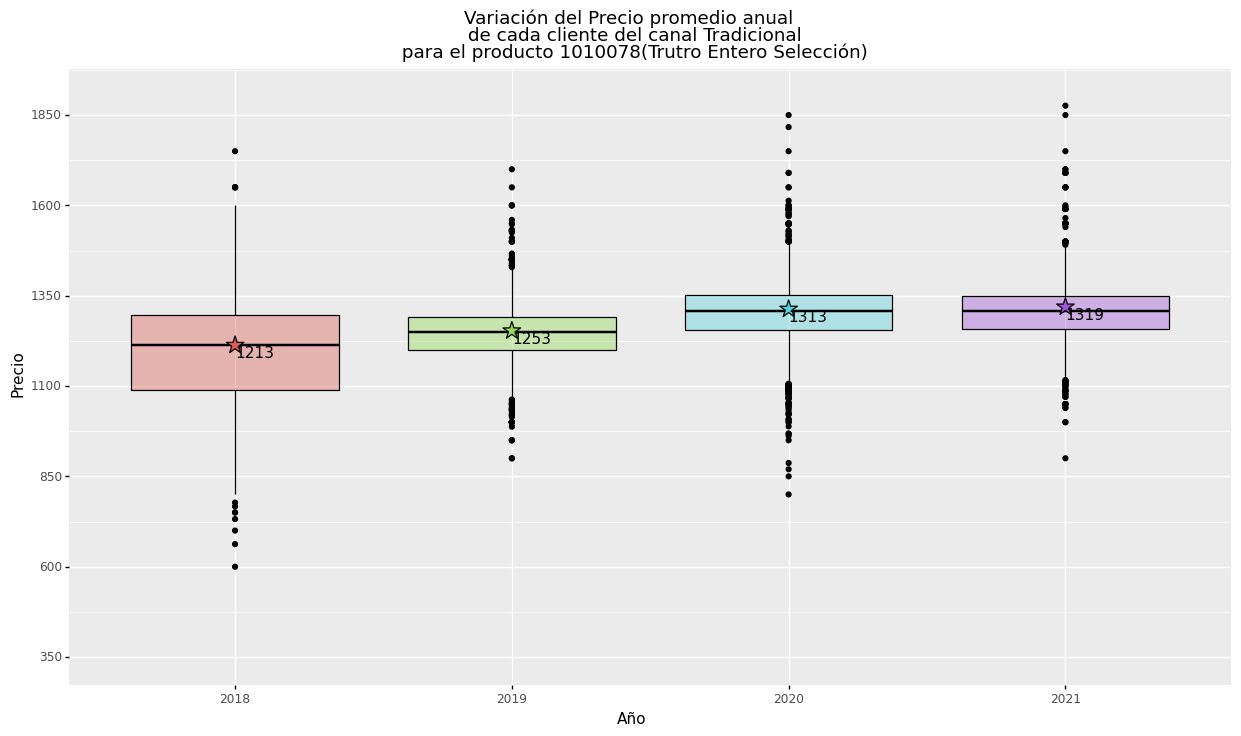

<ggplot: (139787705591)>

In [53]:
s=data_i['Material (Nombre)'].unique()[0]
Y_Graph='Precio'

Graph_KG_mes=(
ggplot(
    df_mean
    ,aes(
        x='Año',#df["Mes"].apply(lambda x: Mes_name(x) ),
        y= Y_Graph
        ,color='Año'
        ,fill='Año'
        ))

+ geom_boxplot(df,color='black',alpha=0.4)
    
+ geom_point(df_mean
             ,shape='*',color='black',
             size=7)
             #,
             #fill=df['Año'],
             #)#df['Año'])


  +geom_text(
             label=df_mean[Y_Graph].round(0)
            ,ha='left',color='black',va='top'
            ,lineheight=14
            )#hjust=0,vjust=0

    
+coord_cartesian(ylim = [350,1900])

+scale_y_continuous( breaks=range(350,1900,250))
#limits=(350,1900), Se eliminó el atributo limits, pero se dejo el break

    
+ggtitle(
            'Variación del ' +Y_Graph + ' promedio anual \n de cada cliente'
            + ' del canal '+ Tipo_de_Cliente 
            +'\n para el producto '+s
            )

+theme(figure_size=(15,8), legend_position='none')
)
print(
'Variación del ' +Y_Graph + ' promedio anual \n de cada cliente'
            + ' del canal '+ Tipo_de_Cliente 
            +'\n para el producto '+s
        )


Graph_KG_mes

In [54]:
print(#'El poducto de estudio el '+s+ ' sobre'
            'Variación del ' +Y_Graph + ' promedio anual \n de cada cliente'
            + ' del canal '+ Tipo_de_Cliente 
            +'\n para el producto '+s
        )

Variación del Precio promedio anual 
 de cada cliente del canal Tradicional
 para el producto 1010078(Trutro Entero Selección)


###### Grafico plot 

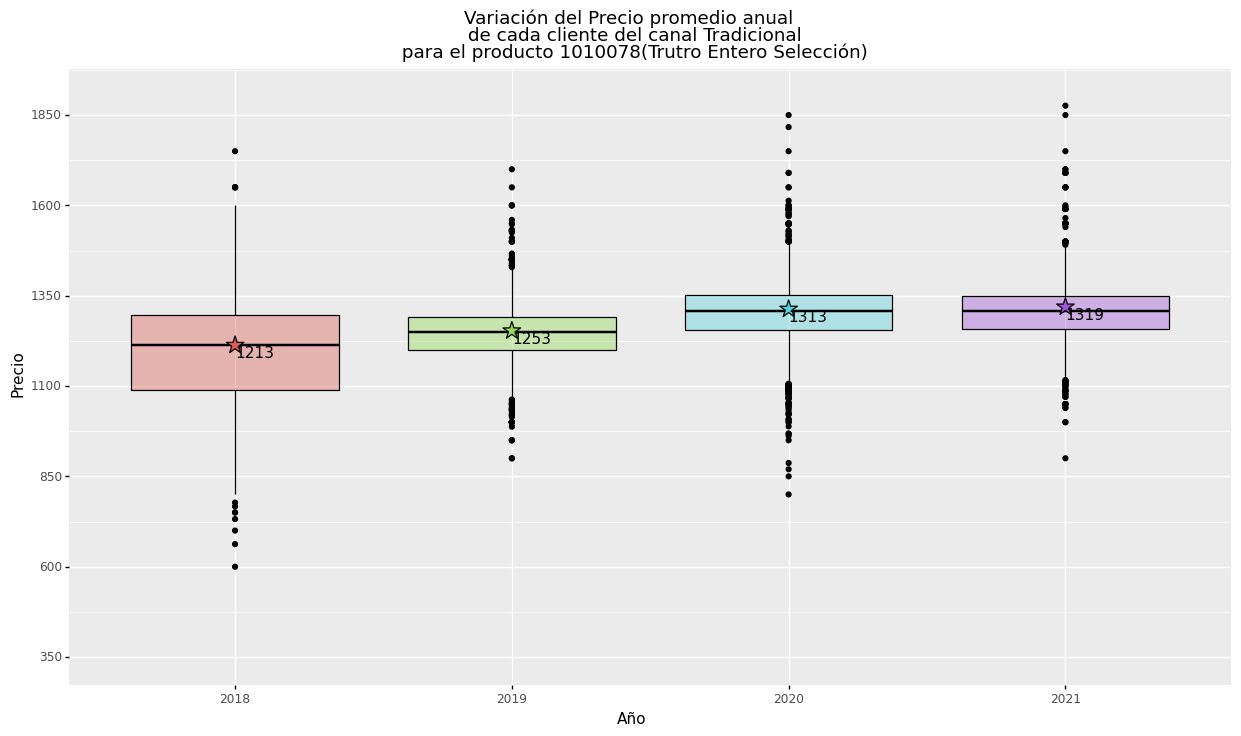

<ggplot: (139787705591)>

In [55]:
Graph_KG_mes

#### PNG Save

In [56]:
pngfill= Png_file_direct_Graphic_Canal_Material+'\\'+Y_Graph

file_name='Boxplot '+Y_Graph+' promedio de cada cliente Año'
ggsave(plot = Graph_KG_mes,
       filename = file_name, 
       path =pngfill
      ,dpi = 300
      )

C:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 15 x 8 in image.
C:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: C:\Users\user\Documents\Graficos\Canal Tradicional\1010078\Precio\Boxplot Precio promedio de cada cliente Año


## Ingresos 
`Y_Graph='Ingresos en CLP'`

### Suma Total, mes/Año

#### Grafica codigo


##### data 

###### df inicio 

In [57]:
Y_Graph='Ingresos en CLP'
data_i['Ingresos en CLP']=data_i['Precio']*data_i['Kilos Venta KG']
df=data_i.groupby(['Año','Mes']).sum().reset_index()
df['Ingresos en millones de CLP']=(df[Y_Graph].apply(lambda x: x/(10**6)))

df=df.dropna()
df['Ingresos en millones de CLP']=df['Ingresos en millones de CLP'].round(2)
    
df.head()

,Año,Mes,Kilos Venta KG,Precio,Ingresos en CLP,Ingresos en millones de CLP
0,2018,Abril,221184,2834520,242033080,242.03
1,2018,Agosto,258827,3086208,275717336,275.72
2,2018,Diciembre,295518,2999671,316598001,316.60
3,2018,Enero,213826,2990957,246969962,246.97
4,2018,Febrero,153430,2534857,188740503,188.74


In [58]:
#=======================
# Agrega un label con el valor maximo a la fila correpondiente
#=======================


Y_Graph='Ingresos en millones de CLP'

Var_M='Mes'
dfy=pd.DataFrame(
    columns=(np.concatenate([df.columns,['Maximo_y']])))
for i in df[Var_M].unique():
    dfx=df[df[Var_M]==i].copy()
    max_V=dfx[Y_Graph].max()
    dfx['Maximo_y']=dfx[Y_Graph].apply( lambda x: int(x) if x==max_V else'' )
    dfy=dfy.append(dfx)
dfy.head()



,Año,Mes,Kilos Venta KG,Precio,Ingresos en CLP,Ingresos en millones de CLP,Maximo_y
0,2018,Abril,221184,2834520,242033080,242.03,
12,2019,Abril,295029,3434470,323295279,323.30,
24,2020,Abril,518977,7476014,547406656,547.41,
36,2021,Abril,561043,8115456,647154053,647.15,647
1,2018,Agosto,258827,3086208,275717336,275.72,


###### ultima modificacion a df y creación df_mean 

In [59]:
df=dfy

In [60]:
df_mean=df.groupby(['Mes']).mean().reset_index()
df_mean['Maximo_y']=df_mean[Y_Graph]
df_mean.head()

,Mes,Ingresos en millones de CLP,Maximo_y
0,Abril,439.9725,439.9725
1,Agosto,552.9200,552.9200
2,Diciembre,398.6025,398.6025
3,Enero,432.8875,432.8875
4,Febrero,373.8025,373.8025


###### bloque grafica 

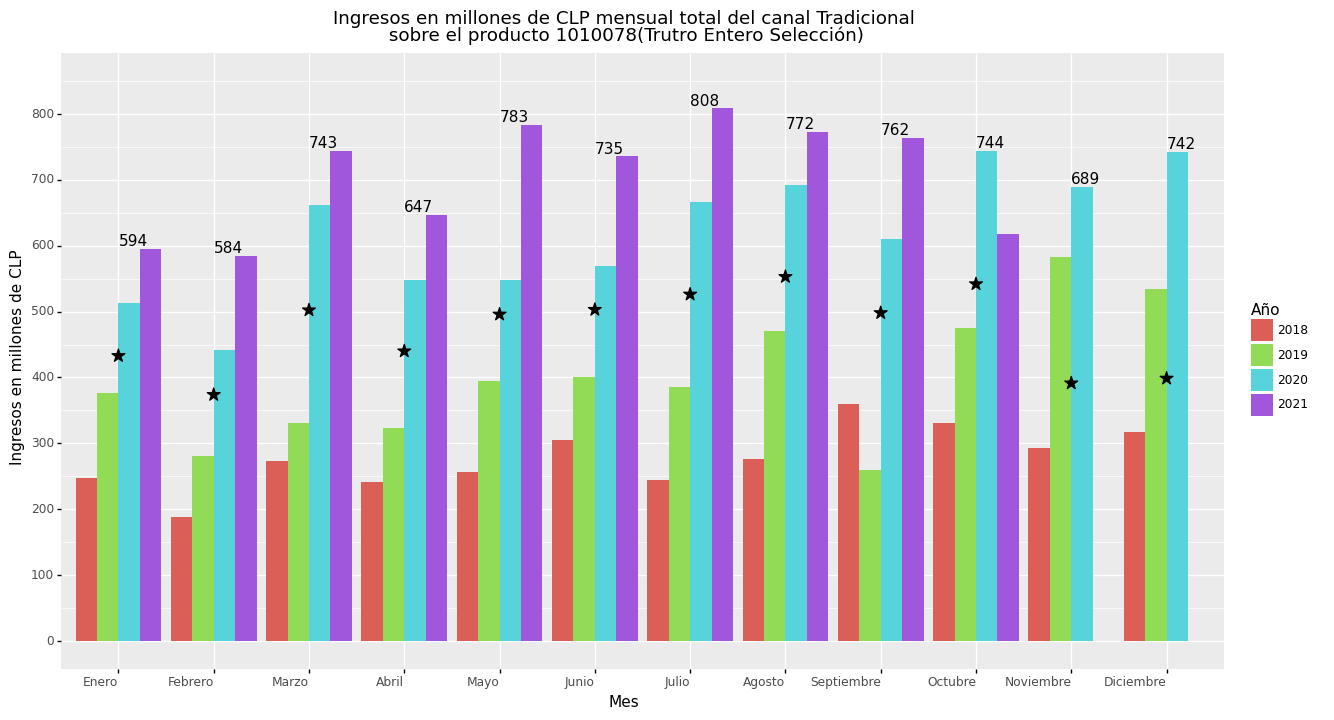

<ggplot: (139727691349)>

In [61]:
s=data_i['Material (Nombre)'].unique()[0]
Y_Graph='Ingresos en millones de CLP'

Graph_KG_mes_A_sum=(
ggplot(
    df
    ,aes(
        x='Mes',#df["Mes"].apply(lambda x: Mes_name(x) ),
        y= Y_Graph ,
        fill='Año'
        ,label='Maximo_y'
    ))#color


    
+geom_col( position='dodge')

+geom_text(color='black'
            ,ha='left'
            ,va='bottom'
          #,label=df.Maximo_y
          )
    
+ geom_point(data=df_mean,color='black',fill='black',shape='*',size=5)
    
+ggtitle(Y_Graph+' mensual total'+' del canal '+ Tipo_de_Cliente 
             +'\n sobre el producto '+s)

+theme(axis_text_x = element_text(hjust=1),figure_size=(15,8))

+scale_y_continuous(limits=(0,850), breaks=range(0,850,100))
    
+scale_x_discrete(limits= ['Enero','Febrero','Marzo','Abril',
'Mayo','Junio','Julio','Agosto',
'Septiembre','Octubre',
'Noviembre','Diciembre'])
)
Graph_KG_mes_A_sum

##### Grafica

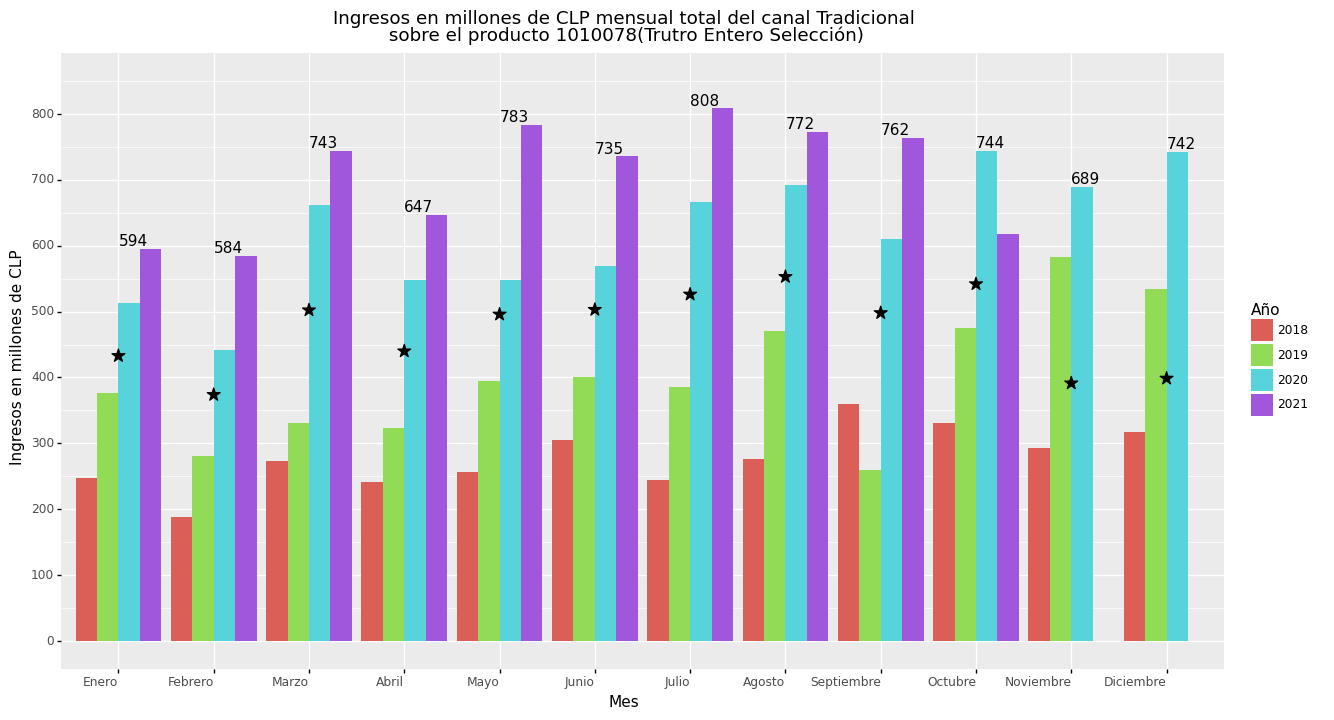

<ggplot: (139727691349)>

In [62]:
Graph_KG_mes_A_sum

### Distribución Suma, mensual/Año por cada cliente
Trabaja con data_i que son los datos  `Material=y_producto & Canal = Tipo_de_cliente`

##### Data Group 

###### Pre data

In [63]:
Dic_col['Base']

['Material (Nombre)', 'Kilos Venta KG', 'Precio', 'Cliente']

In [64]:
data_i.groupby(['Cliente','Año','Mes']).sum()

Kilos Venta KG  Precio  Ingresos en CLP
Cliente  Año  Mes                                                
10003742 2018 Abril                    0       0                0
              Agosto                   0       0                0
              Diciembre                0       0                0
              Enero                    0       0                0
              Febrero                  0       0                0
...                                  ...     ...              ...
9997223  2021 Marzo                    0       0                0
              Mayo                     0       0                0
              Noviembre                0       0                0
              Octubre                  0       0                0
              Septiembre               0       0                0

[243504 rows x 3 columns]

###### data a usar 

In [65]:
Y_Graph='Ingresos en CLP'
#data_i['Ingresos en CLP']=data_i['Precio']*data_i['Kilos Venta KG']
df=data_i.groupby(['Cliente','Año','Mes']).sum().reset_index()
df['Ingresos en miles de CLP']=(df[Y_Graph].apply(lambda x: x/(10**3)))
df=df.dropna()

df['Ingresos en miles de CLP']=df['Ingresos en miles de CLP'].round(2)

df

,Cliente,Año,Mes,Kilos Venta KG,Precio,Ingresos en CLP,Ingresos en miles de CLP
0,10003742,2018,Abril,0,0,0,0.0
1,10003742,2018,Agosto,0,0,0,0.0
2,10003742,2018,Diciembre,0,0,0,0.0
3,10003742,2018,Enero,0,0,0,0.0
4,10003742,2018,Febrero,0,0,0,0.0
...,...,...,...,...,...,...,...
243499,9997223,2021,Marzo,0,0,0,0.0
243500,9997223,2021,Mayo,0,0,0,0.0
243501,9997223,2021,Noviembre,0,0,0,0.0
243502,9997223,2021,Octubre,0,0,0,0.0


##### Describe 

In [66]:
Y_Graph='Ingresos en miles de CLP'

In [67]:
df.groupby('Año').describe()[Y_Graph]

,count,mean,std,min,25%,50%,75%,max
Año,,,,,,,,
2018,60876.0,54.731344,343.685871,0.0,0.0,0.0,0.0000,17940.55
2019,60876.0,79.130005,434.858445,0.0,0.0,0.0,0.0000,21159.20
2020,60876.0,122.009518,527.019035,0.0,0.0,0.0,32.5675,27683.85
2021,60876.0,115.811298,466.558151,0.0,0.0,0.0,30.5800,16621.71


In [68]:
df[(df[Y_Graph]>0)].groupby('Año').describe()[Y_Graph]


,count,mean,std,min,25%,50%,75%,max
Año,,,,,,,,
2018,8429.0,395.281205,847.670600,1.55,47.96,140.80,412.500,17940.55
2019,12663.0,380.408921,891.361517,11.55,31.90,118.71,371.765,21159.20
2020,23453.0,316.695153,811.974286,15.40,30.58,66.22,286.440,27683.85
2021,21497.0,327.958718,739.502609,13.80,29.70,84.92,315.630,16621.71


In [69]:
df.groupby('Mes').describe()[Y_Graph]

,count,mean,std,min,25%,50%,75%,max
Mes,,,,,,,,
Abril,20292.0,86.728228,387.386909,0.0,0.0,0.0,27.50,14528.22
Agosto,20292.0,108.992700,477.504138,0.0,0.0,0.0,28.38,17634.23
Diciembre,20292.0,78.573326,438.912023,0.0,0.0,0.0,0.00,19197.01
Enero,20292.0,85.331881,449.031432,0.0,0.0,0.0,0.00,16849.95
Febrero,20292.0,73.685170,393.387925,0.0,0.0,0.0,0.00,17429.65
Julio,20292.0,103.720572,449.014463,0.0,0.0,0.0,27.06,15593.45
Junio,20292.0,99.143536,457.840282,0.0,0.0,0.0,26.99,16571.42
Marzo,20292.0,98.997628,525.953050,0.0,0.0,0.0,27.50,27683.85
Mayo,20292.0,97.742089,429.221932,0.0,0.0,0.0,28.38,12337.01


In [70]:
df[df[Y_Graph]>0].groupby('Mes').describe()[Y_Graph]

,count,mean,std,min,25%,50%,75%,max
Mes,,,,,,,,
Abril,6403.0,274.853850,651.094537,18.06,28.380,57.420,250.6900,14528.22
Agosto,6136.0,360.443263,814.540522,12.50,30.580,94.380,363.1450,17634.23
Diciembre,3971.0,401.513458,924.619284,1.55,33.175,121.440,411.3900,19197.01
Enero,4801.0,360.665388,867.768170,15.40,31.900,102.080,350.8500,16849.95
Febrero,4853.0,308.102094,758.248116,19.80,29.040,84.700,279.1800,17429.65
Julio,6311.0,333.496728,756.099345,11.55,28.380,80.940,326.7000,15593.45
Junio,5820.0,345.673649,803.560010,17.60,28.930,87.780,336.4350,16571.42
Marzo,5358.0,374.927187,971.761720,12.10,29.700,95.700,351.4725,27683.85
Mayo,5788.0,342.671469,749.684808,13.80,30.540,87.560,333.2550,12337.01


##### Grafico 

###### Grafico Codigo 
Cuidado, no se puede aplicar un filtro y una modificación al mismo tiempo, ya que se tienen difernetes dimenciones.

In [71]:
Y_Graph='Ingresos en miles de CLP'
#[df.Año==2020]\
df_mean=df[df[Y_Graph]>0]\
.groupby(['Año','Mes']).mean().reset_index()
df_mean=df_mean.dropna()
df_mean.head()

#+geom_point(df_mean,shape='*',size=4)
#+scale_y_continuous(limits=(0,250), breaks=range(0,250,25))


,Año,Mes,Kilos Venta KG,Precio,Ingresos en CLP,Ingresos en miles de CLP
0,2018,Abril,337.685496,4327.511450,369516.152672,369.516153
1,2018,Agosto,377.298834,4498.845481,401920.314869,401.920394
2,2018,Diciembre,394.550067,4004.901202,422694.260347,422.694259
3,2018,Enero,314.450000,4398.466176,363191.120588,363.191118
4,2018,Febrero,253.184818,4182.932343,311452.975248,311.452888


Demanda mensual promedio 
 de cada cliente del canal Tradicional
 para el producto 1010078(Trutro Entero Selección)


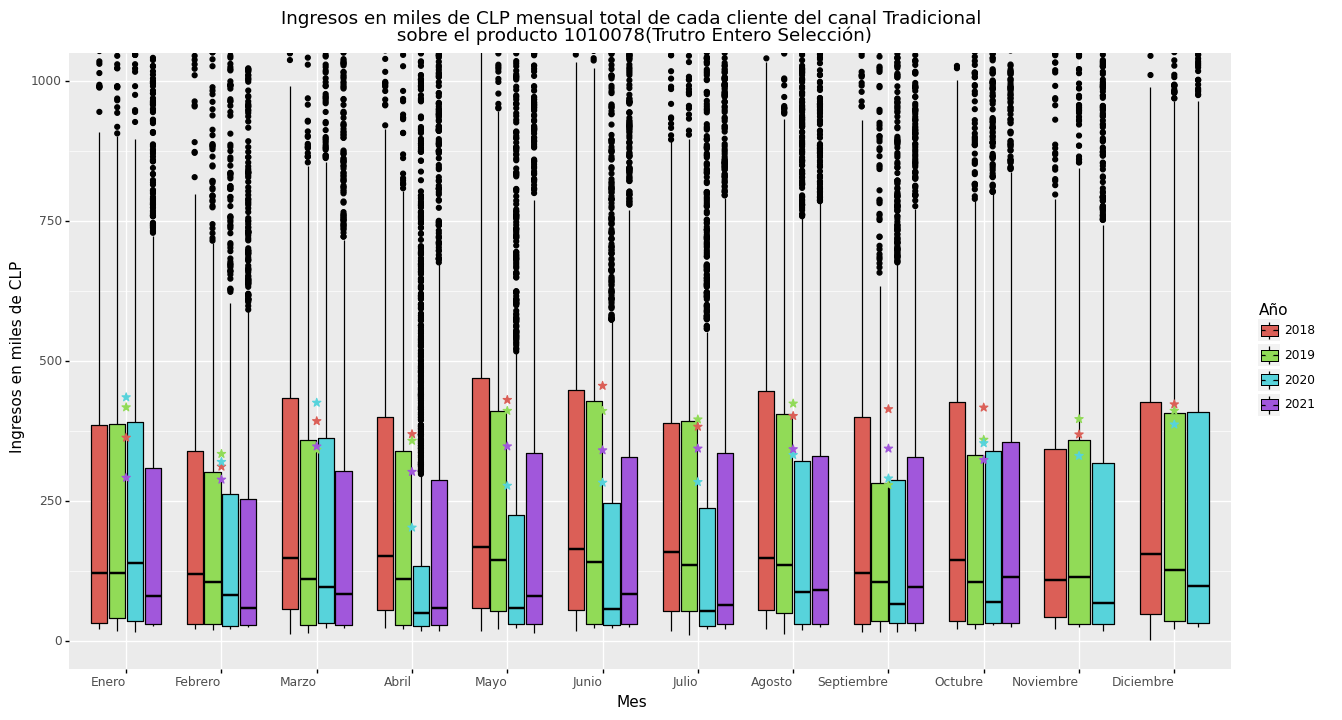

<ggplot: (139787622705)>

In [72]:
s=data_i['Material (Nombre)'].unique()[0]
Y_Graph='Ingresos en miles de CLP'

Graph_KG_mes_sum=(
ggplot(
    df[(df[Y_Graph]>0)]
    ,aes(
        x='Mes',#df["Mes"].apply(lambda x: Mes_name(x) ),
        y= Y_Graph
        ,color='Año'
        ,fill='Año' ))


+ geom_boxplot(color='black')

    
+geom_point(df_mean,shape='*',size=3)
    
    
+ggtitle(Y_Graph+' mensual total de cada cliente'+' del canal '+ Tipo_de_Cliente 
             +'\n sobre el producto '+s)

+theme(axis_text_x = element_text(hjust=1),figure_size=(15,8))


+coord_cartesian(ylim = [0,1000])

#+scale_y_continuous(limits=(0,700), breaks=range(0,700,50)) # Segmenta los datos
    
+scale_x_discrete(limits= ['Enero','Febrero','Marzo','Abril',
'Mayo','Junio','Julio','Agosto',
'Septiembre','Octubre',
'Noviembre','Diciembre'])
)

print(
        'Demanda mensual promedio \n de cada cliente'
        + ' del canal '+ Tipo_de_Cliente 
        +'\n para el producto '+s
)

Graph_KG_mes_sum

###### Grafico plot 

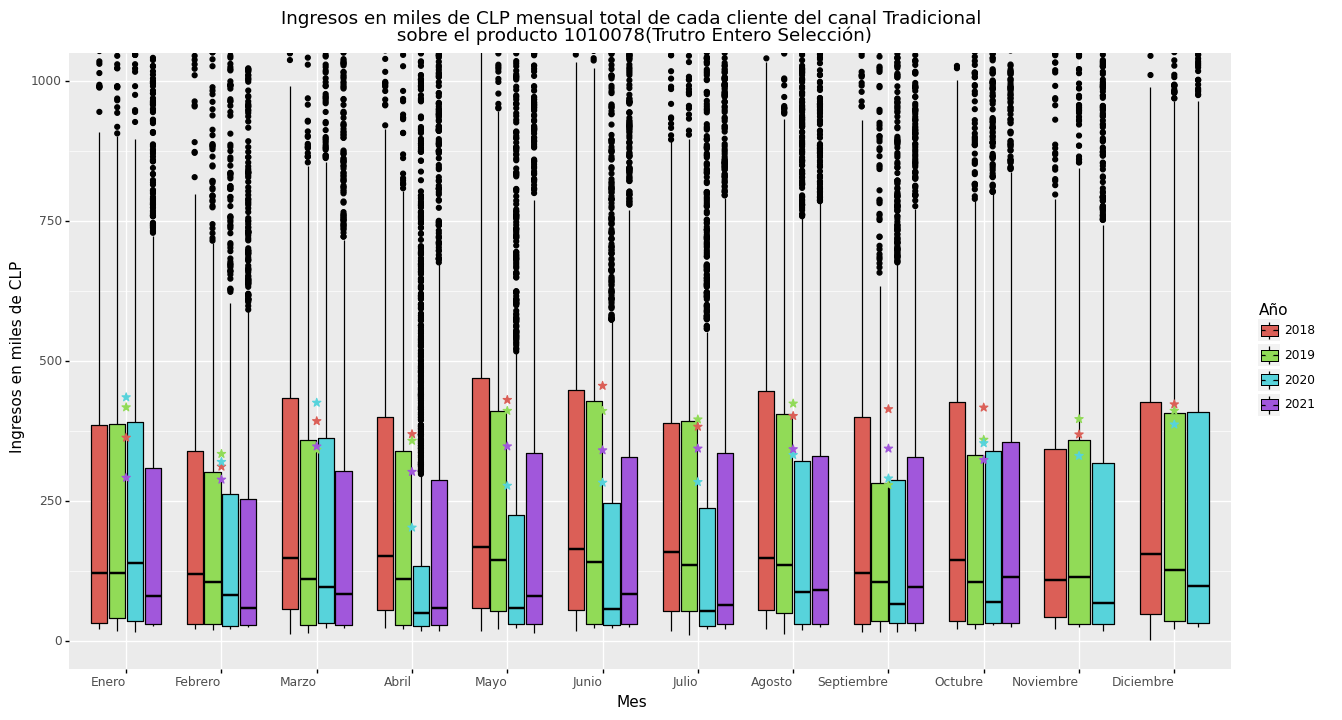

<ggplot: (139787622705)>

In [73]:
Graph_KG_mes_sum

### PDF save

##### graphics to save 

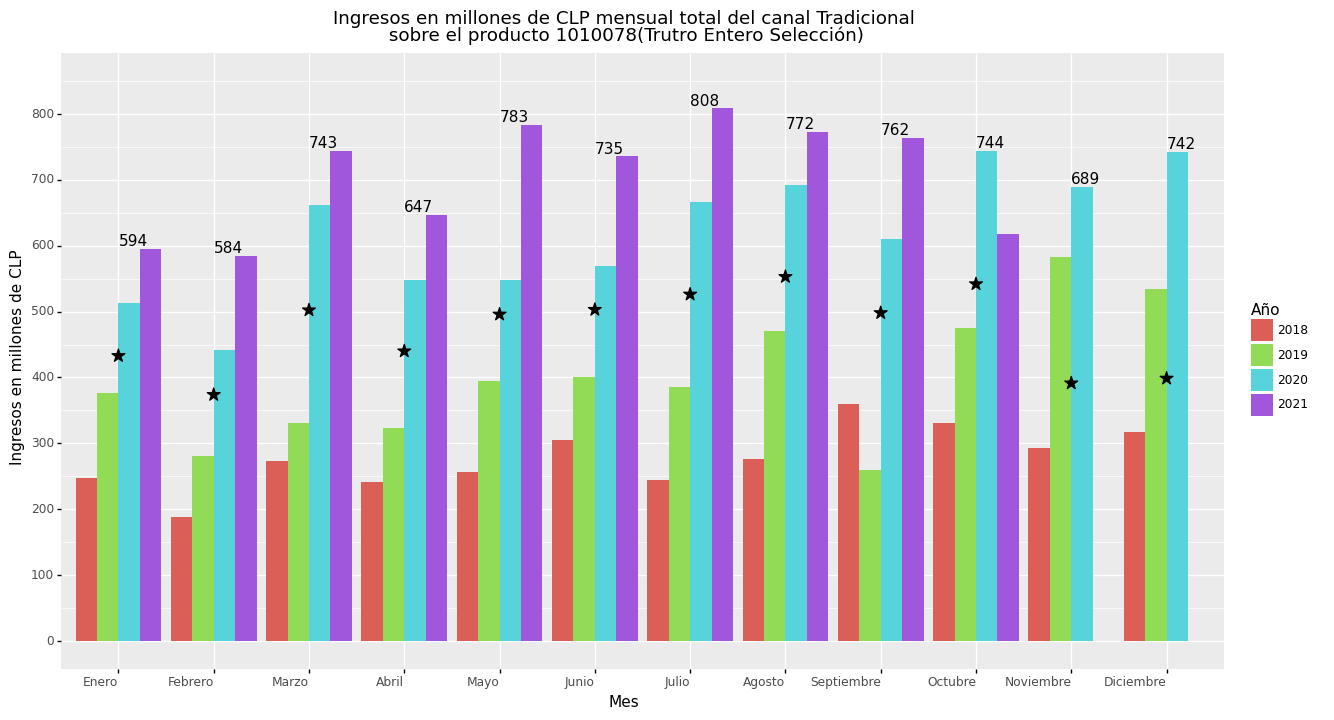

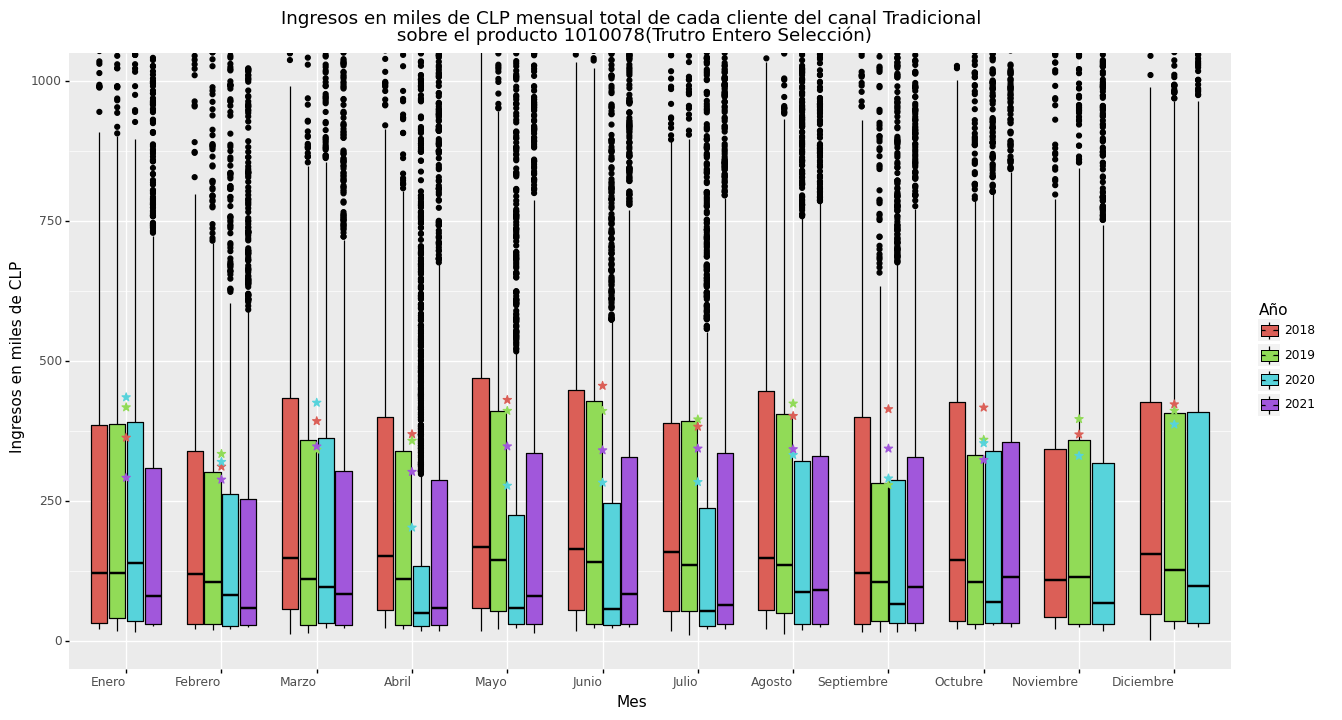

[<ggplot: (139727691349)>, <ggplot: (139787622705)>]

In [74]:
[Graph_KG_mes_A_sum,Graph_KG_mes_sum]

##### PDF saver

```python
#============================
# Se guardan variaciones lineales
#============================
start_time = time.time()
save_as_pdf_pages(list_Graph_KG_mes
                  ,file_direct_Graphic+'/'+Y_producto+"/Boxplot Mensual Kilos Venta.pdf")
time_convert(time.time()-start_time)
```

In [75]:
#```python
#============================
# Se guardan variaciones lineales
#============================
start_time = time.time()
save_as_pdf_pages(
                    [Graph_KG_mes_A_sum,Graph_KG_mes_sum]
                    ,Png_file_direct_Graphic_Canal_Material +"\\Suma Mensual "+Y_Graph+ ".pdf")
time_convert(time.time()-start_time)
#```

C:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:820: PlotnineWarning: Filename: C:\Users\user\Documents\Graficos\Canal Tradicional\1010078\Suma Mensual Ingresos en miles de CLP.pdf


Time Lapsed = 0:0:4.960758686065674 
 H:m:s


# Precio Temporal 

## Precio Mensual 

In [ ]:
#======================================
# Precio de venta Iterativo
#======================================

#----------------------------------------
# funcion que define los quiebres
#--------------------------------------------------------------------



#======================================
# Precio de venta Iterativo
#======================================
Y_Graph='Precio'

list_Graph_precio_mes=[]
for T_i in data['Tipo de cliente'].unique():
    print(T_i)
    for i in data.Material.unique():
        # Dataframe
        df=data.loc[(data['Material']==i) &
                            (data['Tipo de cliente']==T_i)
                      ].copy()#data
        # Nombre del producto
        s=df[df.Material==i]['Nivel 4.1'].unique()[0]

        
        print(i,s)
        
        #-------------------------------------------------
        # Grafico
        list_Graph_precio_mes.append(ggplot(df
                ,aes(
                    x=df["Mes"].apply(lambda x: Mes_name(x) ),
                    y= Y_Graph ,color='Año' ))\
            + geom_boxplot()
              #+scale_x_datetime(breaks=date_breaks('1 month') ,labels=custom_date_format1)

             +ggtitle('El Poducto de estudio es '+i+' ('+s+')'+ ' Sobre el canal '+ T_i
                     +'\n Variacion del '+Y_Graph + ' Mensual'
                     )
             +theme(axis_text_x = element_text(#angle=90,
                                               hjust=1),figure_size=(15,8))
                + scale_x_discrete(
                        limits= 
                        ['Enero','Febrero','Marzo','Abril',
                        'Mayo','Junio','Julio','Agosto',
                        'Septiembre','Octubre',
                        'Noviembre','Diciembre'])
        )

In [ ]:
list_Graph_precio_mes

#### PDF save

```python
#============================
# Se guardan variaciones lineales
#============================
start_time = time.time()
save_as_pdf_pages(list_Graph_precio_mes
                  ,file_direct_Graphic+'/'+Y_producto+"/Boxplot Mensual Precio.pdf")
time_convert(time.time()-start_time)
```

## Semanal 

In [ ]:
#======================================
# Una iteracion
#======================================

i=Y_producto
T_i=Tipo_de_Cliente

Y_Graph='Precio'

def Mes_name(x):
    D=['Enero','Febrero','Marzo','Abril',
    'Mayo','Junio','Julio','Agosto',
    'Septiembre','Octubre',
    'Noviembre','Diciembre']
    return(D[int(x)-1])


#=============================
# Data
#=============================
df=data.loc[(data['Material']==i) &
                    (data['Tipo de cliente']==T_i) 
               #&(data['Kilos Venta KG']<1000)
              ].copy()#data
#df.head()

"""
df['Mes_num']=df["Mes"]#.apply(lambda x: Mes_name(x))
df['Mes']=df["Mes_num"].apply(lambda x: Mes_name(x))
df[['Mes','Mes_num','Día natural']].head()
"""
df.Semana=df['Semana'].astype('category')
df.Mes=df.Mes.apply(Mes_name) 

s=df[df.Material==i]['Nivel 4.1'].unique()[0]

print(T_i)
print(i,s)

Graph=(ggplot(df
        ,aes(
            x='Semana',#.astype('category'),
            y= Y_Graph 
            ,color='Mes'
        ))\
    + geom_boxplot()
      #+scale_x_datetime(breaks=date_breaks('1 month') ,labels=custom_date_format1)

     +ggtitle('El Poducto de estudio es '+Y_producto+' Sobre el canal '+ Tipo_de_Cliente
             +'\n Variacion del '+Y_Graph + ' Semanal'
             )
     +theme(axis_text_x = element_text(#angle=90,
                                       hjust=1),figure_size=(25,8))
     +facet_grid('Año~.')
)


In [ ]:
Graph

#### Iter

In [ ]:
#======================================
# Una iteracion
#======================================
"""
i=Y_producto
T_i=Tipo_de_Cliente
"""
Y_Graph='Precio'

def Mes_name(x):
    D=['Enero','Febrero','Marzo','Abril',
    'Mayo','Junio','Julio','Agosto',
    'Septiembre','Octubre',
    'Noviembre','Diciembre']
    return(D[int(x)-1])


List_boxplor_week=[]
for T_i in data['Tipo de cliente'].unique():
    print( ''.join(['-' for j in range(1,20)]))
    print(T_i)
    for i in data.Material.unique():
        #=============================
        # Data
        #=============================
        df=data.loc[(data['Material']==i) &
                            (data['Tipo de cliente']==T_i) 
                       #&(data['Kilos Venta KG']<1000)
                      ].copy()#data

        df.Semana=df['Semana'].astype('category')
        df.Mes=df.Mes.apply(Mes_name) 

        s=df[df.Material==i]['Nivel 4.1'].unique()[0]

        print(i,s)

        List_boxplor_week.append(ggplot(df
                ,aes(
                    x='Semana',#.astype('category'),
                    y= Y_Graph 
                    ,color='Mes'
                ))\
            + geom_boxplot()
              #+scale_x_datetime(breaks=date_breaks('1 month') ,labels=custom_date_format1)

             +ggtitle('El Poducto de estudio es '+i+' Sobre el canal '+ T_i
                     +'\n Variacion del '+Y_Graph + ' Semanal'
                     )
             +theme(axis_text_x = element_text(#angle=90,
                                               hjust=1),figure_size=(25,8))
             +facet_grid('Año~.')
        )


#### PDF save

```python
#============================
# Se guardan variaciones lineales
#============================
start_time = time.time()
save_as_pdf_pages(List_boxplor_week
                  ,file_direct_Graphic+'/'+Y_producto+"/Boxplot Semanal Precio.pdf")
time_convert(time.time()-start_time)
```

# Precio volumen 

Como son graficos de dispersion, puede que no sea conveniente evualuar a cada uno de los canales, por lo cual se procede a atacar al canal tradicional.

###  Dispersión promedio

###### Codigo 

In [ ]:
df_group_kg = data[
    np.concatenate([['Tipo de cliente'],Dic_col['Base']])
    ].groupby(['Tipo de cliente','Cliente']
              ).mean().reset_index()


df_group_kg.groupby(['Tipo de cliente']).describe().reset_index()

In [ ]:
p=ggplot(
    df_group_kg
        ,aes(
            x='Kilos Venta KG',
            y= 'Precio'
            ,color='Tipo de cliente'
        ))\
    + geom_point(alpha=0.6)

######  Grafico

In [ ]:
p

#### Png Save


```python
ggsave(filename = None, plot = None, device = None, format = None,
               path = None, scale = 1, width = None, height = None, units = "in",
               dpi = 300, limitsize=True, **kwargs)
```

In [ ]:
file_name='Dispersión precios Volumen'
ggsave(plot = p,
       filename = file_name, 
       path =file_direct_Graphic+'/'+Y_producto
      ,dpi = 300
      )


In [37]:
time_lapsed = end_time - start_time_0
time_convert(time_lapsed)

NameError: name 'end_time' is not defined